<a href="https://www.kaggle.com/toducanh/to-duc-anh-11196328?scriptVersionId=84415461" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn import linear_model
import category_encoders as ce

import re
import plotly.express as px
import plotly.figure_factory as ff

%matplotlib inline

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.0-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
plt.rcParams['figure.dpi'] = 150
sns.set(rc={"figure.dpi":150, 'savefig.dpi':350})
sns.set_context('notebook')
sns.set_style("ticks")

<a id="section-one"></a>
# Load and preview data

## Load all data

In [3]:
test_data = pd.read_csv('../input/dseb61-data-preparation/test.csv', sep = ';')
test_data

Id                                     name  year  km_driven    fuel  \
0        1          Skoda Rapid 1.6 MPI AT Elegance  2016      11000  Petrol   
1        2                      Honda City i VTEC V  2017      35000  Petrol   
2        3        Hyundai Xcent 1.2 Kappa SX Option  2014      80000  Petrol   
3        4  Mahindra Scorpio 2009-2014 SLE 7S BSIII  2014     145241  Diesel   
4        5        Ford Ecosport 1.5 Diesel Titanium  2015      92651  Diesel   
...    ...                                      ...   ...        ...     ...   
2123  2124            Hyundai Grand i10 Nios Sportz  2020       2000  Petrol   
2124  2125                   Maruti Swift Dzire VDI  2018     100000  Diesel   
2125  2126                 Tata Indica V2 DLE BSIII  2011     172000  Diesel   
2126  2127                Hyundai Creta 1.6 CRDi SX  2017      47000  Diesel   
2127  2128                         Maruti Swift VXI  2012      24300  Petrol   

     seller_type transmission         owner     mileage   engine  max_power  \
0         Dealer    Automatic   First Owner   14.3 kmpl  1598 CC  103.5 bhp   
1     Individual       Manual   First Owner   17.8 kmpl  1497 CC  117.3 bhp   
2     Individual       Manual   First Owner   19.1 kmpl  1197 CC     82 bhp   
3     Individual       Manual   First Owner  12.05 kmpl  2179 CC    120 bhp   
4         Dealer       Manual   First Owner   21.7 kmpl  1498 CC  98.96 bhp   
...          ...          ...           ...         ...      ...        ...   
2123      Dealer       Manual   First Owner   20.7 kmpl  1197 CC  81.86 bhp   
2124  Individual       Manual  Second Owner   28.4 kmpl  1248 CC  74.02 bhp   
2125  Individual       Manual  Second Owner  17.88 kmpl  1396 CC   52.8 bhp   
2126  Individual       Manual  Second Owner  19.67 kmpl  1582 CC  126.2 bhp   
2127      Dealer       Manual   First Owner  21.21 kmpl  1197 CC  81.80 bhp   

                     torque  seats  
0            153Nm@ 3800rpm    5.0  
1            145Nm@ 4600rpm    5.0  
2            114Nm@ 4000rpm    5.0  
3       290Nm@ 1800-2800rpm    7.0  
4       215Nm@ 1750-2500rpm    5.0  
...                     ...    ...  
2123      113.75Nm@ 4000rpm    5.0  
2124         190Nm@ 2000rpm    5.0  
2125          85Nm@ 2500rpm    5.0  
2126  259.9Nm@ 1900-2750rpm    5.0  
2127         113Nm@ 4200rpm    5.0  

[2128 rows x 13 columns]

In [4]:
train_data = pd.read_csv('../input/dseb61-data-preparation/train.csv',sep=';')
train_data

name  year  selling_price  \
0                           Tata Nexon 1.5 Revotorq XM  2018         850000   
1                         Hyundai i20 Active SX Diesel  2018         750000   
2                               Toyota Fortuner 4x2 AT  2015        1500000   
3                            Hyundai Verna 1.6 VTVT SX  2015         795000   
4                       Volvo XC40 D4 Inscription BSIV  2019        3800000   
...                                                ...   ...            ...   
5995                                 Maruti A-Star Lxi  2010         235000   
5996                            Maruti Wagon R LXI CNG  2018         390000   
5997                        Tata Tigor 1.2 Revotron XT  2018         450000   
5998  Mahindra Bolero 2011-2019 DI NON AC BS III White  2011         250000   
5999                             Honda Amaze SX i-DTEC  2016         550000   

      km_driven    fuel seller_type transmission         owner     mileage  \
0          9500  Diesel  Individual       Manual   First Owner   21.5 kmpl   
1         30000  Diesel  Individual       Manual   First Owner  21.19 kmpl   
2         80000  Diesel  Individual    Automatic  Second Owner  12.55 kmpl   
3         35000  Petrol  Individual       Manual   First Owner  17.01 kmpl   
4         20000  Diesel  Individual    Automatic   First Owner   18.0 kmpl   
...         ...     ...         ...          ...           ...         ...   
5995      50000  Petrol  Individual       Manual   First Owner   19.0 kmpl   
5996      40000     CNG  Individual       Manual   First Owner  26.6 km/kg   
5997      75000  Petrol  Individual       Manual   First Owner   20.3 kmpl   
5998     100000  Diesel  Individual       Manual  Second Owner  15.96 kmpl   
5999      35000  Diesel  Individual       Manual   First Owner   25.8 kmpl   

       engine  max_power                  torque  seats  
0     1497 CC  108.5 bhp     260Nm@ 1500-2750rpm    5.0  
1     1396 CC  88.76 bhp  219.66nm@ 1500-2750rpm    5.0  
2     2982 CC  168.5 bhp     360Nm@ 1400-3200rpm    7.0  
3     1591 CC  121.3 bhp        154.9Nm@ 4200rpm    5.0  
4     1969 CC    190 bhp                   400Nm    5.0  
...       ...        ...                     ...    ...  
5995   998 CC   66.1 bhp           90Nm@ 3500rpm    5.0  
5996   998 CC  58.16 bhp           77Nm@ 3500rpm    5.0  
5997  1199 CC     84 bhp          114Nm@ 3500rpm    5.0  
5998  2523 CC     63 bhp     180Nm@ 1440-1500rpm    9.0  
5999  1498 CC   98.6 bhp          200Nm@ 1750rpm    5.0  

[6000 rows x 13 columns]

In [5]:
train_data = train_data.drop(5537)

In [6]:
sample_data = pd.read_csv('../input/dseb61-data-preparation/sample.csv')
sample_data

Id  Predicted
0        1      10000
1        2      20000
2        3      30000
3        4      40000
4        5      50000
...    ...        ...
2123  2124   21240000
2124  2125   21250000
2125  2126   21260000
2126  2127   21270000
2127  2128   21280000

[2128 rows x 2 columns]

## View data info

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5999 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5999 non-null   object 
 1   year           5999 non-null   int64  
 2   selling_price  5999 non-null   int64  
 3   km_driven      5999 non-null   int64  
 4   fuel           5999 non-null   object 
 5   seller_type    5999 non-null   object 
 6   transmission   5999 non-null   object 
 7   owner          5999 non-null   object 
 8   mileage        5840 non-null   object 
 9   engine         5840 non-null   object 
 10  max_power      5845 non-null   object 
 11  torque         5839 non-null   object 
 12  seats          5840 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 656.1+ KB


### Other informations about the train dataset

#### Data head

In [8]:
train_data.head(15)

name  year  selling_price  km_driven  \
0            Tata Nexon 1.5 Revotorq XM  2018         850000       9500   
1          Hyundai i20 Active SX Diesel  2018         750000      30000   
2                Toyota Fortuner 4x2 AT  2015        1500000      80000   
3             Hyundai Verna 1.6 VTVT SX  2015         795000      35000   
4        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
5   Fiat Avventura Power Up 1.3 Emotion  2015         500000      96500   
6        Hyundai i10 Magna 1.2 iTech SE  2013         325000      70000   
7               Hyundai EON D Lite Plus  2017         270000      50000   
8          Mahindra Verito 1.5 D4 BSIII  2011         174000     100000   
9        Hyundai i10 Magna 1.2 iTech SE  2012         270000      56000   
10                   BMW 7 Series 730Ld  2007         750000      60000   
11  Volkswagen Polo 1.2 MPI Comfortline  2016         560000      35000   
12               Maruti Swift Dzire VDI  2013         550000     100000   
13                     Maruti Dzire VXI  2020         580000      70000   
14                 Maruti Swift 1.3 LXI  2005          85000     100000   

      fuel seller_type transmission         owner     mileage   engine  \
0   Diesel  Individual       Manual   First Owner   21.5 kmpl  1497 CC   
1   Diesel  Individual       Manual   First Owner  21.19 kmpl  1396 CC   
2   Diesel  Individual    Automatic  Second Owner  12.55 kmpl  2982 CC   
3   Petrol  Individual       Manual   First Owner  17.01 kmpl  1591 CC   
4   Diesel  Individual    Automatic   First Owner   18.0 kmpl  1969 CC   
5   Diesel  Individual       Manual   First Owner   20.5 kmpl  1248 CC   
6   Petrol  Individual       Manual   First Owner  20.36 kmpl  1197 CC   
7   Petrol  Individual       Manual   First Owner   21.1 kmpl   814 CC   
8   Diesel  Individual       Manual  Second Owner   21.0 kmpl  1461 CC   
9   Petrol  Individual       Manual   First Owner  20.36 kmpl  1197 CC   
10  Diesel  Individual    Automatic  Second Owner  14.49 kmpl  2993 CC   
11  Petrol  Individual       Manual   First Owner   16.2 kmpl  1199 CC   
12  Diesel  Individual       Manual   First Owner   23.4 kmpl  1248 CC   
13  Petrol  Individual       Manual   First Owner  23.26 kmpl  1197 CC   
14  Petrol  Individual       Manual   First Owner         NaN      NaN   

    max_power                  torque  seats  
0   108.5 bhp     260Nm@ 1500-2750rpm    5.0  
1   88.76 bhp  219.66nm@ 1500-2750rpm    5.0  
2   168.5 bhp     360Nm@ 1400-3200rpm    7.0  
3   121.3 bhp        154.9Nm@ 4200rpm    5.0  
4     190 bhp                   400Nm    5.0  
5   91.72 bhp          209Nm@ 2000rpm    5.0  
6    78.9 bhp        111.7Nm@ 4000rpm    5.0  
7    55.2 bhp         74.5Nm@ 4000rpm    5.0  
8    64.1 bhp          160Nm@ 2000rpm    5.0  
9    78.9 bhp        111.7Nm@ 4000rpm    5.0  
10    258 bhp          560Nm@ 1500rpm    5.0  
11     74 bhp     110Nm@ 3000-4300rpm    5.0  
12     74 bhp          190Nm@ 2000rpm    5.0  
13  88.50 bhp          113nm@ 4400rpm    5.0  
14        NaN                     NaN    NaN

#### Describe data

In [9]:
train_data.describe()

year  selling_price     km_driven        seats
count  5999.000000   5.999000e+03  5.999000e+03  5840.000000
mean   2013.814302   6.372159e+05  6.997882e+04     5.429795
std       4.026859   7.976223e+05  5.189136e+04     0.976976
min    1983.000000   3.000000e+04  1.000000e+03     2.000000
25%    2011.000000   2.554995e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.900000e+04     5.000000
max    2020.000000   6.523000e+06  1.500000e+06    14.000000

In [10]:
rows, cols = train_data.shape
print(f'This dataframe has {rows} rows and {cols} cols')

This dataframe has 5999 rows and 13 cols


In [11]:
cols = train_data.columns
cols

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

#### View unique value and value count

In [12]:
print('fuel unique value: ',train_data['fuel'].unique(),'\n')
print('transmission unique value: ', train_data['transmission'].unique(),'\n')
print('owner unique value: ', train_data['owner'].unique(),'\n')
print('sellertype unique value: ', train_data['seller_type'].unique(),'\n')

fuel unique value:  ['Diesel' 'Petrol' 'LPG' 'CNG'] 

transmission unique value:  ['Manual' 'Automatic'] 

owner unique value:  ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car'] 

sellertype unique value:  ['Individual' 'Dealer' 'Trustmark Dealer'] 



# Data Processing

## View the null value of each column

In [13]:
train_data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          159
engine           159
max_power        154
torque           160
seats            159
dtype: int64

## Try remove the null values and see the dimension of the dataset

In [14]:
print("Shape of train data Before dropping any Row: ",train_data.shape)
train_data = train_data[train_data['mileage'].notna()]
print("Shape of train data After dropping Rows with NULL values in Mileage: ",train_data.shape)
train_data = train_data[train_data['engine'].notna()]
print("Shape of train data After dropping Rows with NULL values in Engine : ",train_data.shape)
train_data = train_data[train_data['max_power'].notna()]
print("Shape of train data After dropping Rows with NULL values in Power  : ",train_data.shape)
train_data = train_data[train_data['torque'].notna()]
print("Shape of train data After dropping Rows with NULL values in Torque  : ",train_data.shape)
train_data = train_data[train_data['seats'].notna()]
print("Shape of train data After dropping Rows with NULL values in Seats  : ",train_data.shape)

Shape of train data Before dropping any Row:  (5999, 13)
Shape of train data After dropping Rows with NULL values in Mileage:  (5840, 13)
Shape of train data After dropping Rows with NULL values in Engine :  (5840, 13)
Shape of train data After dropping Rows with NULL values in Power  :  (5840, 13)
Shape of train data After dropping Rows with NULL values in Torque  :  (5839, 13)
Shape of train data After dropping Rows with NULL values in Seats  :  (5839, 13)


In [15]:
train_data = train_data.dropna(how='any')

We can see that after dropping some NA from columns, the number of row pretty much stays the same, which indicates that NAs come from the same row.

## Reset index of the train data

In [16]:
train_data = train_data.reset_index(drop=True)

# Features Engineering

In [17]:
train_data.at[5,'name'].split()[0]

'Fiat'

## Get brand's name and remove unit for other variables

In [18]:
for i in range(train_data.shape[0]):
    train_data.at[i, 'brand'] = train_data['name'][i].split()[0]
    train_data.at[i, 'mileage km'] = train_data['mileage'][i].split()[0]
    train_data.at[i, 'cc'] = train_data['engine'][i].split()[0]
    train_data.at[i, 'power'] = train_data['max_power'][i].split()[0]

In [19]:
train_data

name  year  selling_price  \
0                           Tata Nexon 1.5 Revotorq XM  2018         850000   
1                         Hyundai i20 Active SX Diesel  2018         750000   
2                               Toyota Fortuner 4x2 AT  2015        1500000   
3                            Hyundai Verna 1.6 VTVT SX  2015         795000   
4                       Volvo XC40 D4 Inscription BSIV  2019        3800000   
...                                                ...   ...            ...   
5834                                 Maruti A-Star Lxi  2010         235000   
5835                            Maruti Wagon R LXI CNG  2018         390000   
5836                        Tata Tigor 1.2 Revotron XT  2018         450000   
5837  Mahindra Bolero 2011-2019 DI NON AC BS III White  2011         250000   
5838                             Honda Amaze SX i-DTEC  2016         550000   

      km_driven    fuel seller_type transmission         owner     mileage  \
0          9500  Diesel  Individual       Manual   First Owner   21.5 kmpl   
1         30000  Diesel  Individual       Manual   First Owner  21.19 kmpl   
2         80000  Diesel  Individual    Automatic  Second Owner  12.55 kmpl   
3         35000  Petrol  Individual       Manual   First Owner  17.01 kmpl   
4         20000  Diesel  Individual    Automatic   First Owner   18.0 kmpl   
...         ...     ...         ...          ...           ...         ...   
5834      50000  Petrol  Individual       Manual   First Owner   19.0 kmpl   
5835      40000     CNG  Individual       Manual   First Owner  26.6 km/kg   
5836      75000  Petrol  Individual       Manual   First Owner   20.3 kmpl   
5837     100000  Diesel  Individual       Manual  Second Owner  15.96 kmpl   
5838      35000  Diesel  Individual       Manual   First Owner   25.8 kmpl   

       engine  max_power                  torque  seats     brand mileage km  \
0     1497 CC  108.5 bhp     260Nm@ 1500-2750rpm    5.0      Tata       21.5   
1     1396 CC  88.76 bhp  219.66nm@ 1500-2750rpm    5.0   Hyundai      21.19   
2     2982 CC  168.5 bhp     360Nm@ 1400-3200rpm    7.0    Toyota      12.55   
3     1591 CC  121.3 bhp        154.9Nm@ 4200rpm    5.0   Hyundai      17.01   
4     1969 CC    190 bhp                   400Nm    5.0     Volvo       18.0   
...       ...        ...                     ...    ...       ...        ...   
5834   998 CC   66.1 bhp           90Nm@ 3500rpm    5.0    Maruti       19.0   
5835   998 CC  58.16 bhp           77Nm@ 3500rpm    5.0    Maruti       26.6   
5836  1199 CC     84 bhp          114Nm@ 3500rpm    5.0      Tata       20.3   
5837  2523 CC     63 bhp     180Nm@ 1440-1500rpm    9.0  Mahindra      15.96   
5838  1498 CC   98.6 bhp          200Nm@ 1750rpm    5.0     Honda       25.8   

        cc  power  
0     1497  108.5  
1     1396  88.76  
2     2982  168.5  
3     1591  121.3  
4     1969    190  
...    ...    ...  
5834   998   66.1  
5835   998  58.16  
5836  1199     84  
5837  2523     63  
5838  1498   98.6  

[5839 rows x 17 columns]

## Replace those variables in the dataframe with variables we created

In [20]:
train_data['mileage'] = train_data['mileage km'].astype(float)
train_data['engine'] = train_data['cc'].astype(float)
train_data['seats'] = train_data['seats'].astype(int)
train_data['max_power'] = train_data['power'].astype(float)

In [21]:
train_data

name  year  selling_price  \
0                           Tata Nexon 1.5 Revotorq XM  2018         850000   
1                         Hyundai i20 Active SX Diesel  2018         750000   
2                               Toyota Fortuner 4x2 AT  2015        1500000   
3                            Hyundai Verna 1.6 VTVT SX  2015         795000   
4                       Volvo XC40 D4 Inscription BSIV  2019        3800000   
...                                                ...   ...            ...   
5834                                 Maruti A-Star Lxi  2010         235000   
5835                            Maruti Wagon R LXI CNG  2018         390000   
5836                        Tata Tigor 1.2 Revotron XT  2018         450000   
5837  Mahindra Bolero 2011-2019 DI NON AC BS III White  2011         250000   
5838                             Honda Amaze SX i-DTEC  2016         550000   

      km_driven    fuel seller_type transmission         owner  mileage  \
0          9500  Diesel  Individual       Manual   First Owner    21.50   
1         30000  Diesel  Individual       Manual   First Owner    21.19   
2         80000  Diesel  Individual    Automatic  Second Owner    12.55   
3         35000  Petrol  Individual       Manual   First Owner    17.01   
4         20000  Diesel  Individual    Automatic   First Owner    18.00   
...         ...     ...         ...          ...           ...      ...   
5834      50000  Petrol  Individual       Manual   First Owner    19.00   
5835      40000     CNG  Individual       Manual   First Owner    26.60   
5836      75000  Petrol  Individual       Manual   First Owner    20.30   
5837     100000  Diesel  Individual       Manual  Second Owner    15.96   
5838      35000  Diesel  Individual       Manual   First Owner    25.80   

      engine  max_power                  torque  seats     brand mileage km  \
0     1497.0     108.50     260Nm@ 1500-2750rpm      5      Tata       21.5   
1     1396.0      88.76  219.66nm@ 1500-2750rpm      5   Hyundai      21.19   
2     2982.0     168.50     360Nm@ 1400-3200rpm      7    Toyota      12.55   
3     1591.0     121.30        154.9Nm@ 4200rpm      5   Hyundai      17.01   
4     1969.0     190.00                   400Nm      5     Volvo       18.0   
...      ...        ...                     ...    ...       ...        ...   
5834   998.0      66.10           90Nm@ 3500rpm      5    Maruti       19.0   
5835   998.0      58.16           77Nm@ 3500rpm      5    Maruti       26.6   
5836  1199.0      84.00          114Nm@ 3500rpm      5      Tata       20.3   
5837  2523.0      63.00     180Nm@ 1440-1500rpm      9  Mahindra      15.96   
5838  1498.0      98.60          200Nm@ 1750rpm      5     Honda       25.8   

        cc  power  
0     1497  108.5  
1     1396  88.76  
2     2982  168.5  
3     1591  121.3  
4     1969    190  
...    ...    ...  
5834   998   66.1  
5835   998  58.16  
5836  1199     84  
5837  2523     63  
5838  1498   98.6  

[5839 rows x 17 columns]

## Remove unused (useless) variables

In [22]:
train_data.drop(["cc"],axis=1,inplace=True)
train_data.drop(["power"],axis=1,inplace=True)
train_data.drop(["mileage km"],axis=1,inplace=True)

In [23]:
train_data
# should i remove name too? kinda irrelevant but also relevant?
# TODO: THINK ABOUT REMOVING NAME?

name  year  selling_price  \
0                           Tata Nexon 1.5 Revotorq XM  2018         850000   
1                         Hyundai i20 Active SX Diesel  2018         750000   
2                               Toyota Fortuner 4x2 AT  2015        1500000   
3                            Hyundai Verna 1.6 VTVT SX  2015         795000   
4                       Volvo XC40 D4 Inscription BSIV  2019        3800000   
...                                                ...   ...            ...   
5834                                 Maruti A-Star Lxi  2010         235000   
5835                            Maruti Wagon R LXI CNG  2018         390000   
5836                        Tata Tigor 1.2 Revotron XT  2018         450000   
5837  Mahindra Bolero 2011-2019 DI NON AC BS III White  2011         250000   
5838                             Honda Amaze SX i-DTEC  2016         550000   

      km_driven    fuel seller_type transmission         owner  mileage  \
0          9500  Diesel  Individual       Manual   First Owner    21.50   
1         30000  Diesel  Individual       Manual   First Owner    21.19   
2         80000  Diesel  Individual    Automatic  Second Owner    12.55   
3         35000  Petrol  Individual       Manual   First Owner    17.01   
4         20000  Diesel  Individual    Automatic   First Owner    18.00   
...         ...     ...         ...          ...           ...      ...   
5834      50000  Petrol  Individual       Manual   First Owner    19.00   
5835      40000     CNG  Individual       Manual   First Owner    26.60   
5836      75000  Petrol  Individual       Manual   First Owner    20.30   
5837     100000  Diesel  Individual       Manual  Second Owner    15.96   
5838      35000  Diesel  Individual       Manual   First Owner    25.80   

      engine  max_power                  torque  seats     brand  
0     1497.0     108.50     260Nm@ 1500-2750rpm      5      Tata  
1     1396.0      88.76  219.66nm@ 1500-2750rpm      5   Hyundai  
2     2982.0     168.50     360Nm@ 1400-3200rpm      7    Toyota  
3     1591.0     121.30        154.9Nm@ 4200rpm      5   Hyundai  
4     1969.0     190.00                   400Nm      5     Volvo  
...      ...        ...                     ...    ...       ...  
5834   998.0      66.10           90Nm@ 3500rpm      5    Maruti  
5835   998.0      58.16           77Nm@ 3500rpm      5    Maruti  
5836  1199.0      84.00          114Nm@ 3500rpm      5      Tata  
5837  2523.0      63.00     180Nm@ 1440-1500rpm      9  Mahindra  
5838  1498.0      98.60          200Nm@ 1750rpm      5     Honda  

[5839 rows x 14 columns]

In [24]:
train_data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
brand            0
dtype: int64

# EDA (Exploratory Data Analysis)

In [25]:
profile = pp.ProfileReport(train_data)
profile 

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
profile.to_file("final_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5839 entries, 0 to 5838
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5839 non-null   object 
 1   year           5839 non-null   int64  
 2   selling_price  5839 non-null   int64  
 3   km_driven      5839 non-null   int64  
 4   fuel           5839 non-null   object 
 5   seller_type    5839 non-null   object 
 6   transmission   5839 non-null   object 
 7   owner          5839 non-null   object 
 8   mileage        5839 non-null   float64
 9   engine         5839 non-null   float64
 10  max_power      5839 non-null   float64
 11  torque         5839 non-null   object 
 12  seats          5839 non-null   int64  
 13  brand          5839 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 638.8+ KB


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


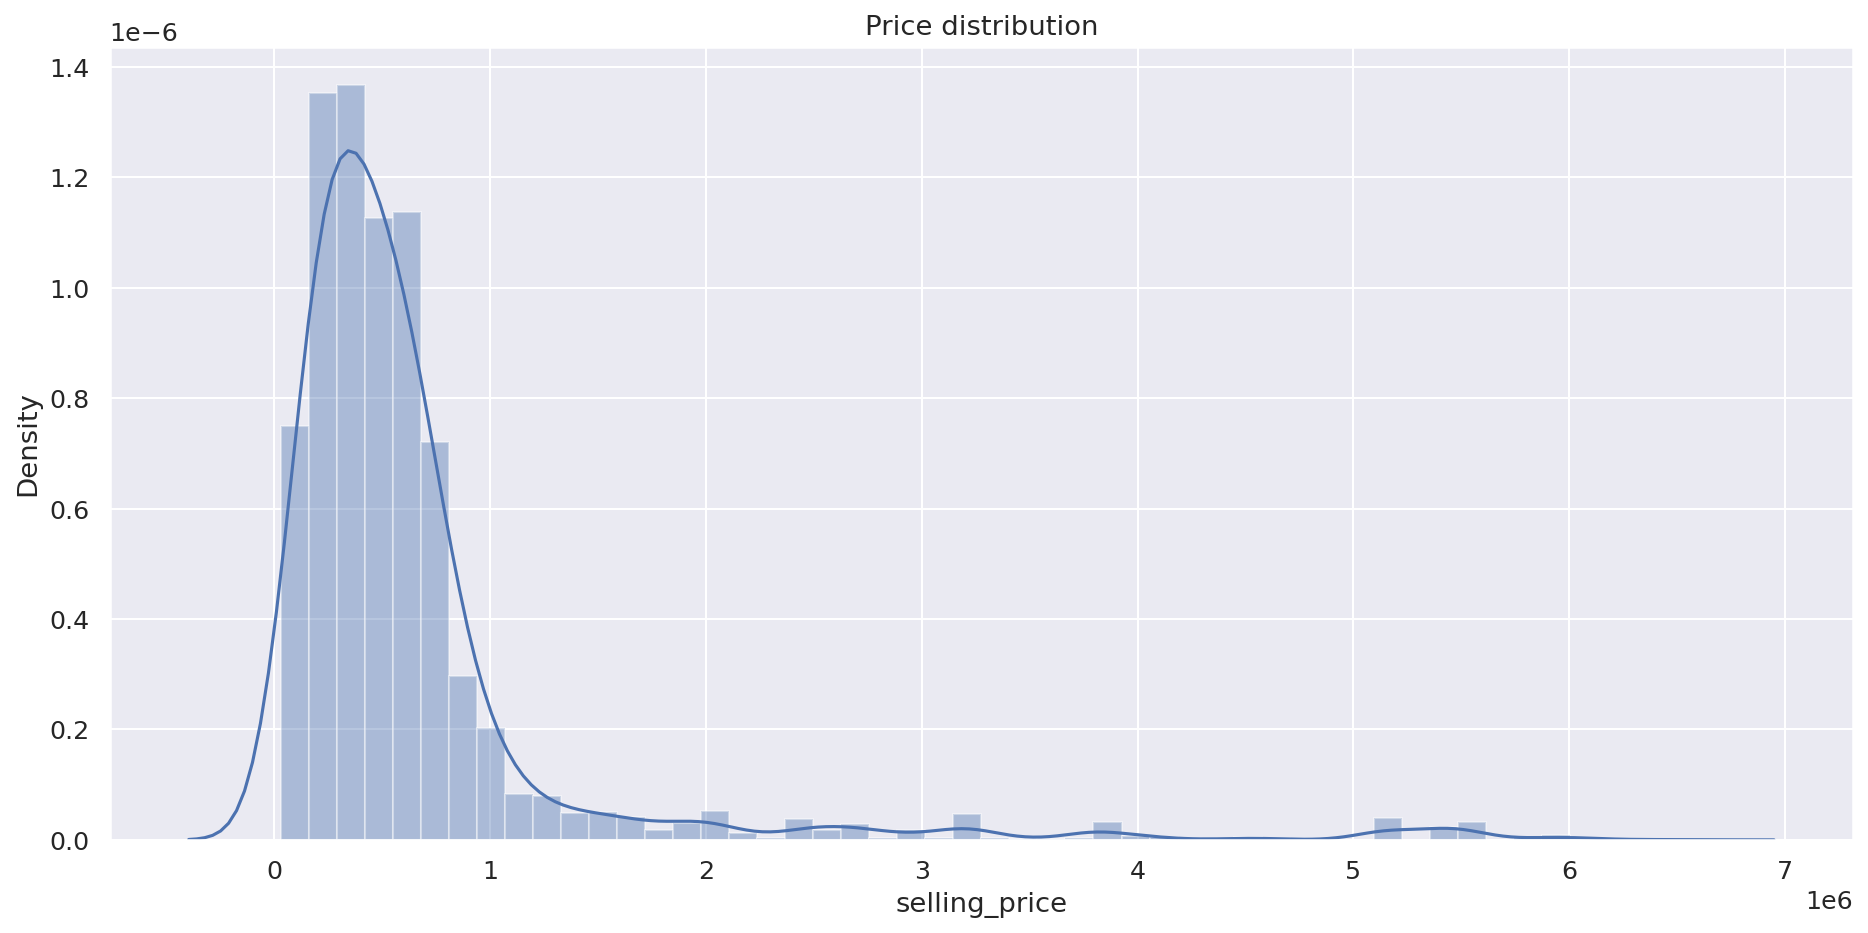

In [28]:
sns.set(font_scale=1.1)
fig, ax = plt.subplots(figsize=(15,7))
ax.set_title("Price distribution")
sns.distplot(train_data['selling_price'])

plt.show()
# CANNOT REMOVE THE WARNING SINCE BY USING THE DISPLOT,
# DISPLOT IS A FIGURE LEVEL FUNCTION, THEREFORE
# EACH PLOT WILL BE A FIGURE, CAN NOT SHOW IN ONE PLOT.

We can see that the reselling price are mostly in less than 2000000 money unit

In [29]:
train_data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'brand'],
      dtype='object')

In [30]:
train_data['fuel'].describe()

count       5839
unique         4
top       Diesel
freq        3192
Name: fuel, dtype: object

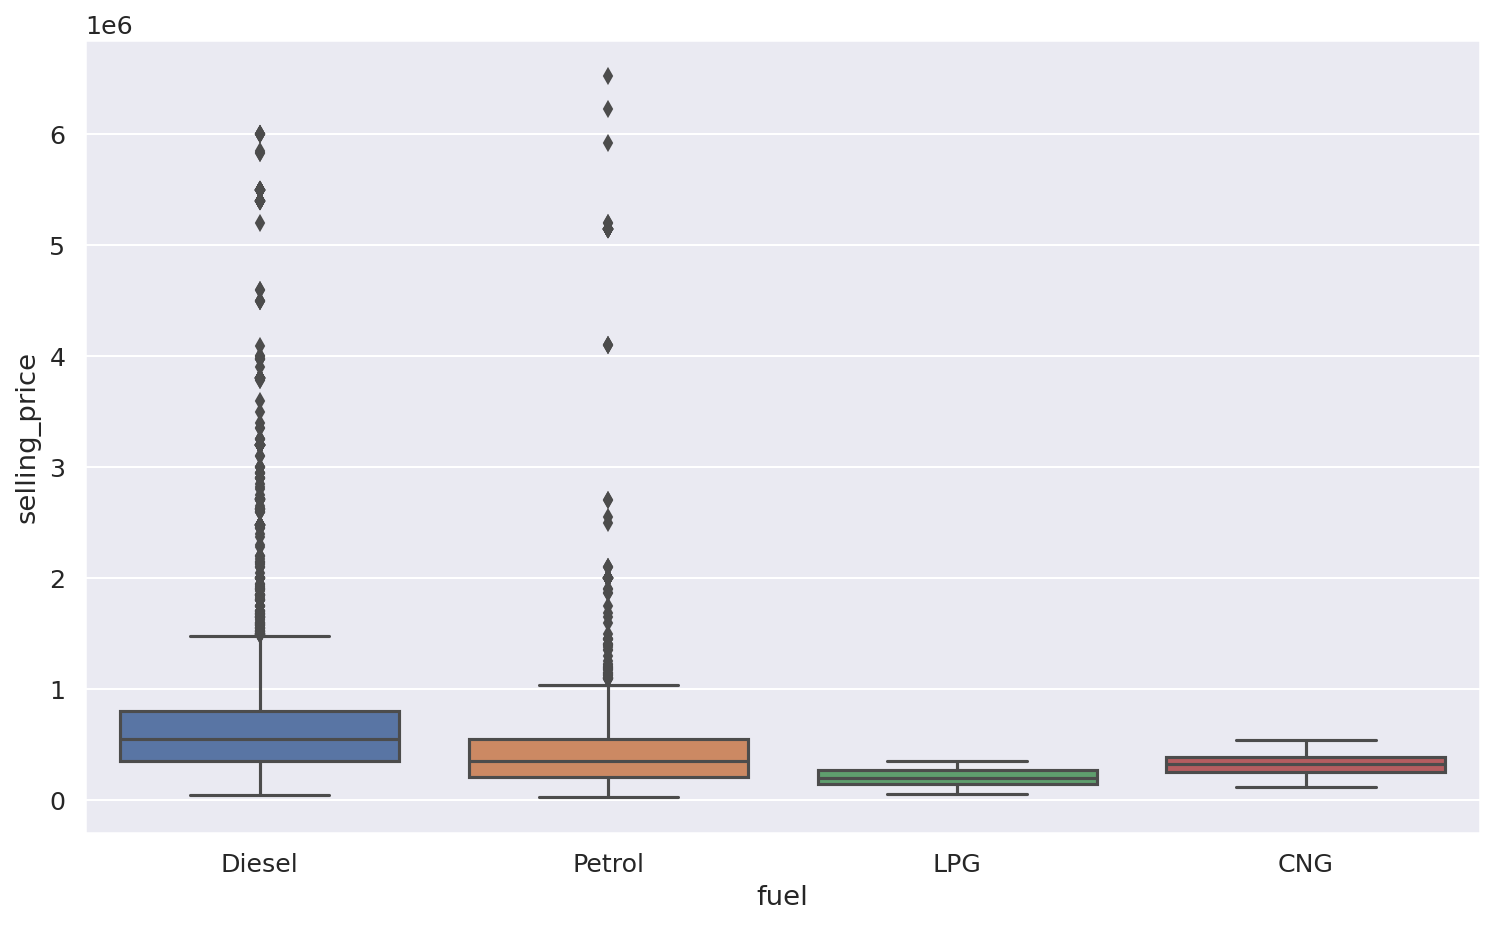

In [31]:
data = pd.concat([train_data['selling_price'], train_data['fuel']], axis=1)
f, ax = plt.subplots(figsize=(12, 7))
fig = sns.boxplot(x='fuel', y="selling_price", data=data)

As seen in the price chart, we can see that the price mostly less than 2000000, and from the boxplot above, we can see cars that have price above 2 mil,.s use diesel and petrol. The outliers indicate that. Besides, we can see on average, the reselling price of diesel powered cars is higher than that of petrol, and those 2 figures are much higher cars that use LPG and CNG as fuel.

<AxesSubplot:xlabel='fuel', ylabel='selling_price'>

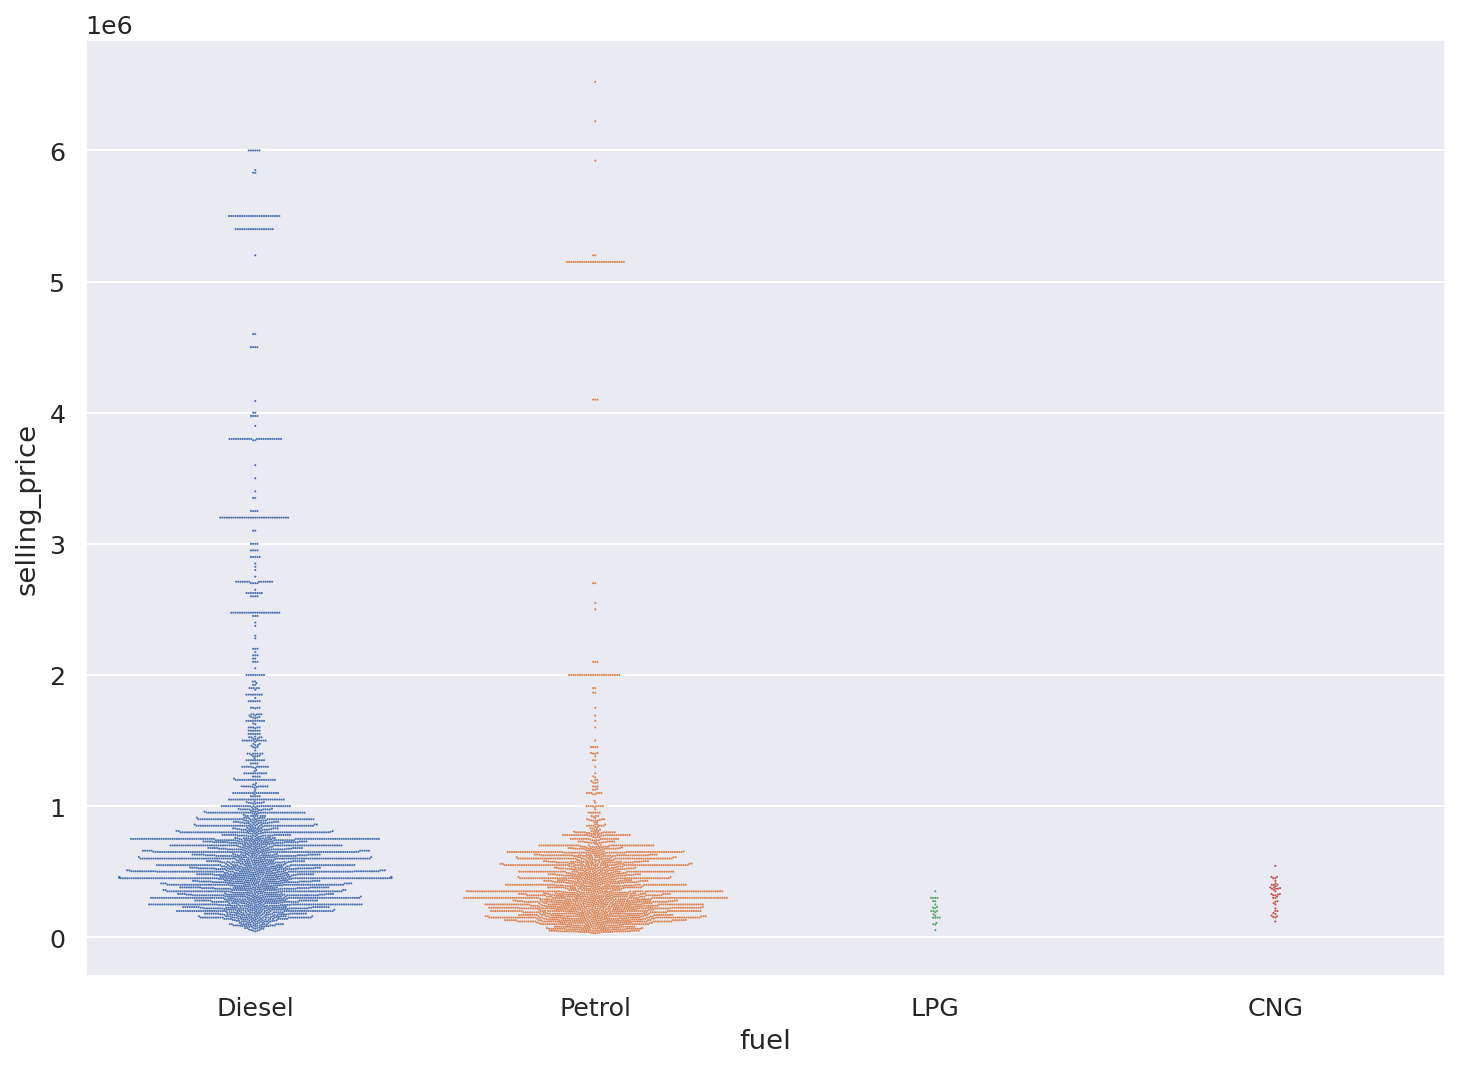

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.swarmplot(x = 'fuel', y ='selling_price', data = train_data, size=1)

From the chart, we can see that the size of each car's fuel type, anfvar = 'Year'
data = pd.concat([train_data['Price'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165);
plt.xticks(rotation=90);

Relation between price and year

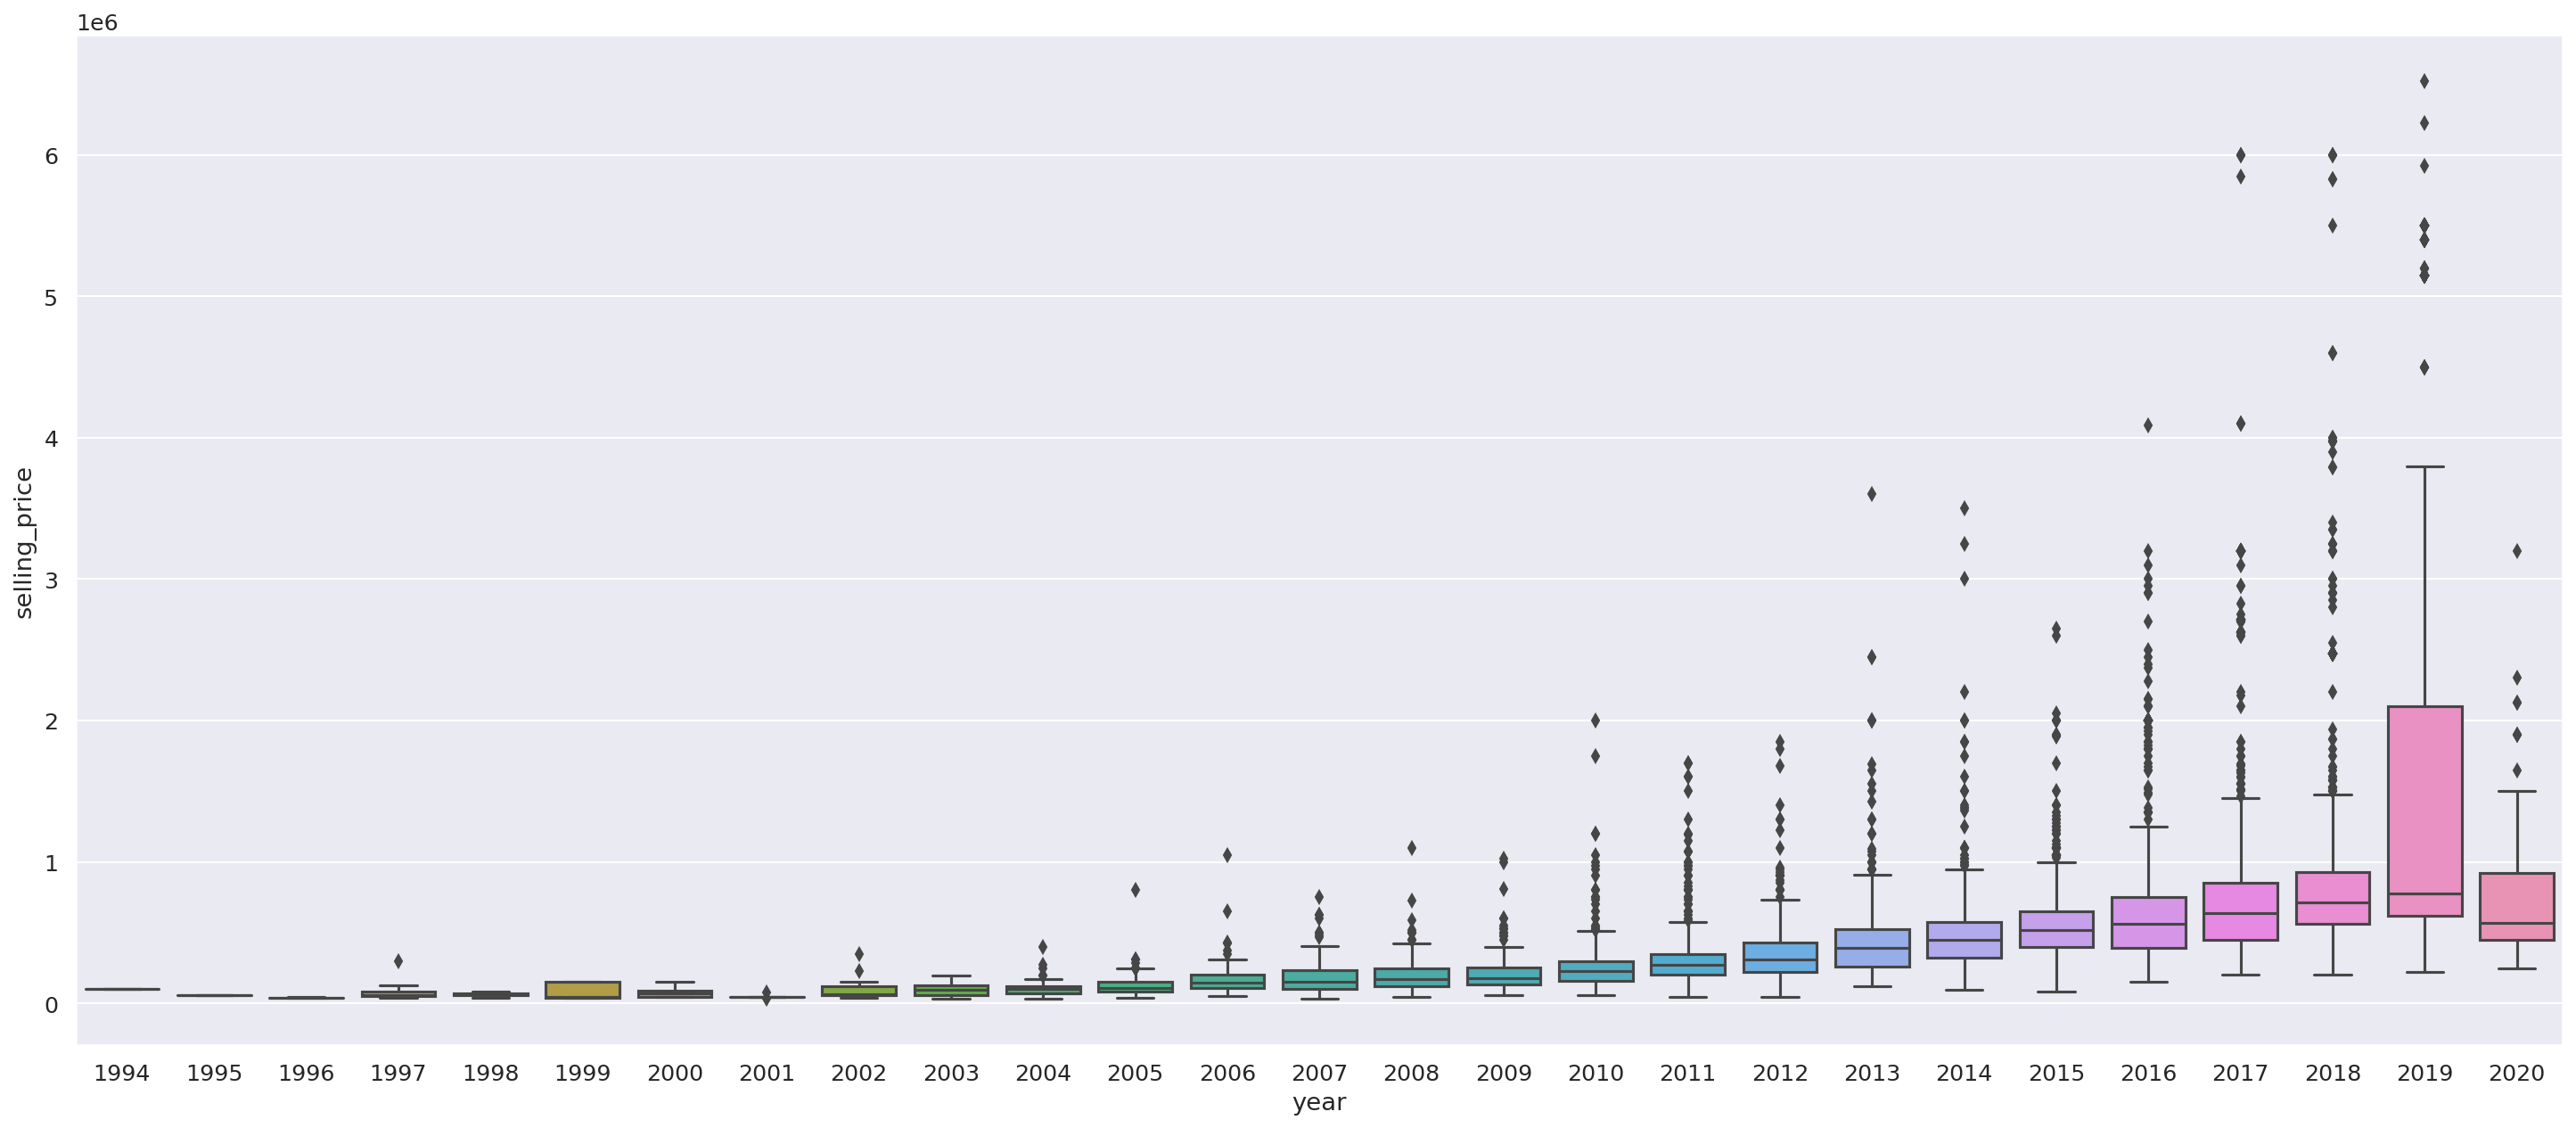

In [33]:
var = 'year'
data = pd.concat([train_data['selling_price'], train_data['year']], axis=1)
f, ax = plt.subplots(figsize=(24, 10))
fig = sns.boxplot(x='year', y="selling_price", data=data)

Well, maybe due to inflation and other factor, average price has gradually increase from year to year, with the highest in 2019, but the covid strike has dragged the average price of 2020 down to price of 2017.

Relation between Fuel and Seller type


initializing swarmplot...


<AxesSubplot:xlabel='seller_type', ylabel='selling_price'>

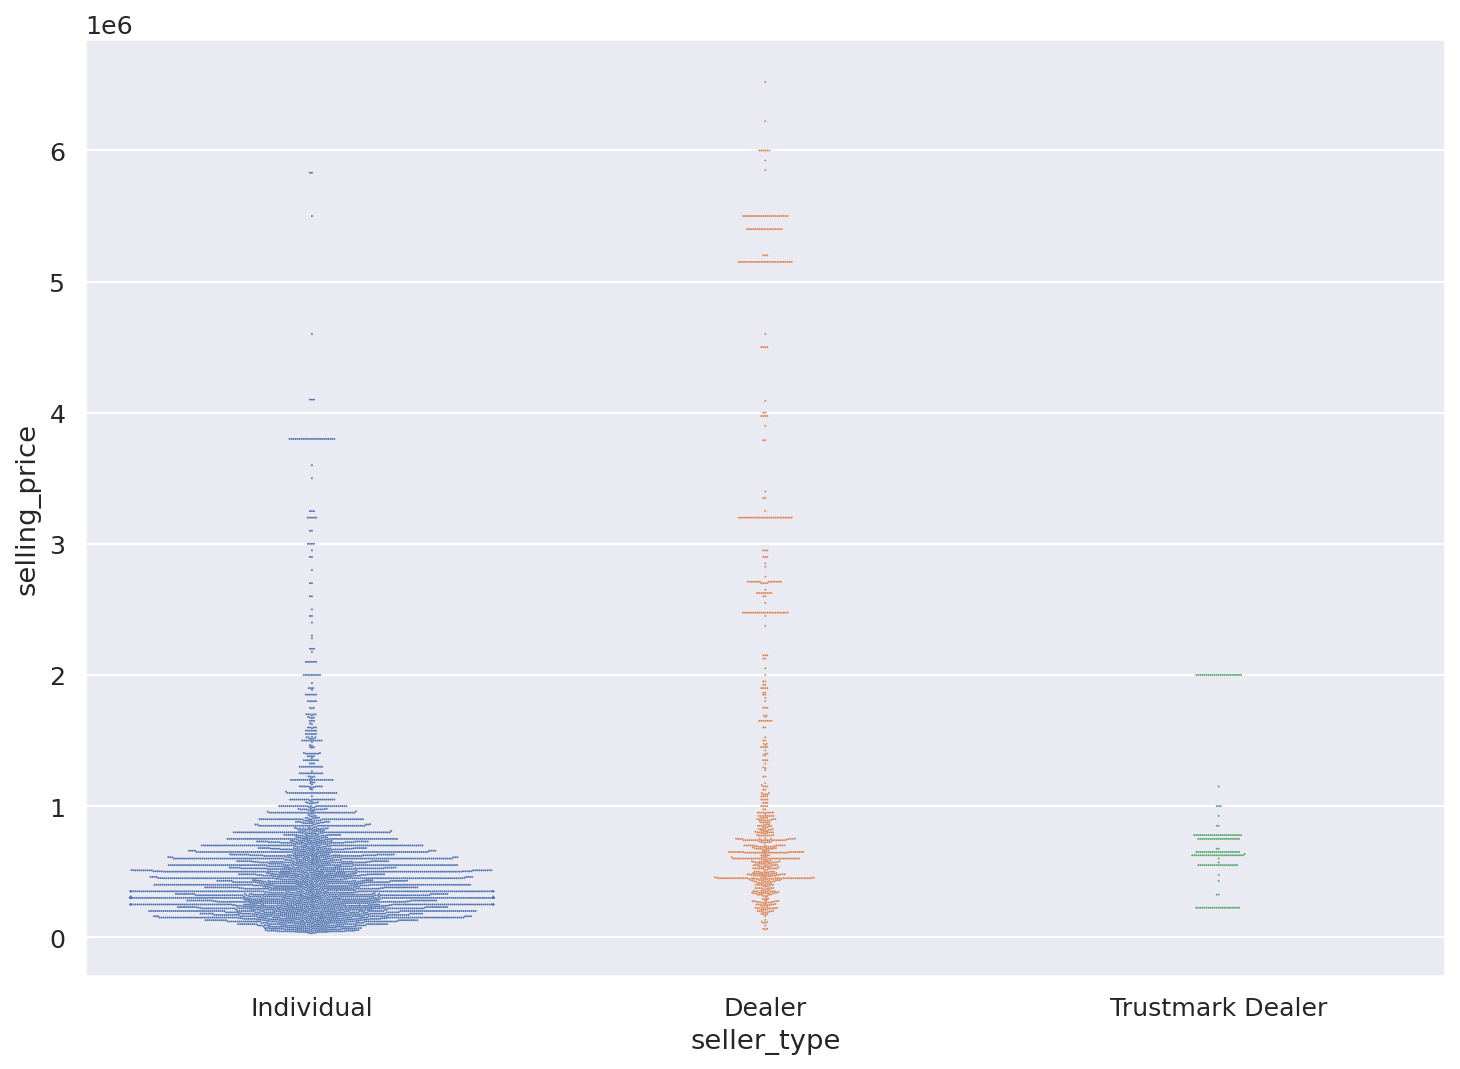

In [34]:
print('initializing swarmplot...')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.swarmplot(x = 'seller_type', y ='selling_price', data = train_data, size=0.93, orient = 'v')

As we can see on the chart, most seller are individual, follow by dealer and trustmark dealer. There are some dealers sell at relatively high price, this might happen because of their reputation.

<AxesSubplot:xlabel='owner', ylabel='selling_price'>

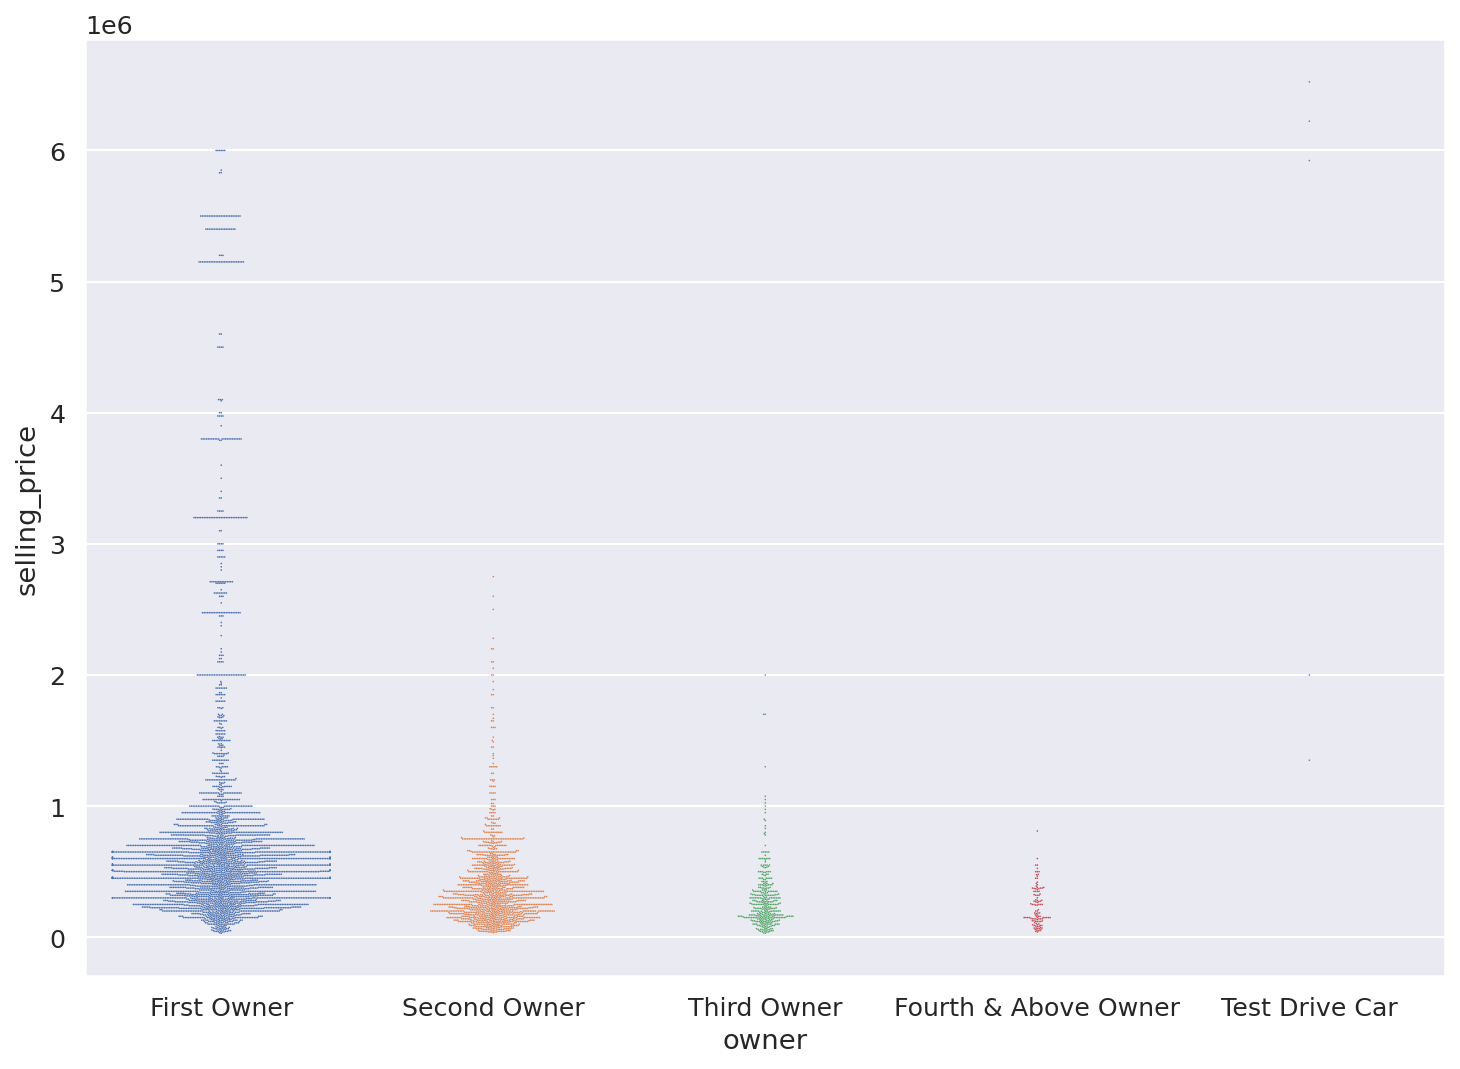

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.swarmplot(x = 'owner', y ='selling_price', data = train_data, size=0.78, orient = 'v')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'Tata'),
  Text(1, 0, 'Hyundai'),
  Text(2, 0, 'Toyota'),
  Text(3, 0, 'Volvo'),
  Text(4, 0, 'Fiat'),
  Text(5, 0, 'Mahindra'),
  Text(6, 0, 'BMW'),
  Text(7, 0, 'Volkswagen'),
  Text(8, 0, 'Maruti'),
  Text(9, 0, 'Ford'),
  Text(10, 0, 'Jaguar'),
  Text(11, 0, 'Chevrolet'),
  Text(12, 0, 'Honda'),
  Text(13, 0, 'Renault'),
  Text(14, 0, 'Skoda'),
  Text(15, 0, 'Datsun'),
  Text(16, 0, 'Jeep'),
  Text(17, 0, 'Nissan'),
  Text(18, 0, 'Audi'),
  Text(19, 0, 'Kia'),
  Text(20, 0, 'Mercedes-Benz'),
  Text(21, 0, 'Ambassador'),
  Text(22, 0, 'Isuzu'),
  Text(23, 0, 'Lexus'),
  Text(24, 0, 'Land'),
  Text(25, 0, 'Force'),
  Text(26, 0, 'Mitsubishi'),
  Text(27, 0, 'MG'),
  Text(28, 0, 'Daewoo'),
  Text(29, 0, 'Ashok'),
  Text(30, 0, 'Opel')])

<Figure size 3000x1500 with 0 Axes>

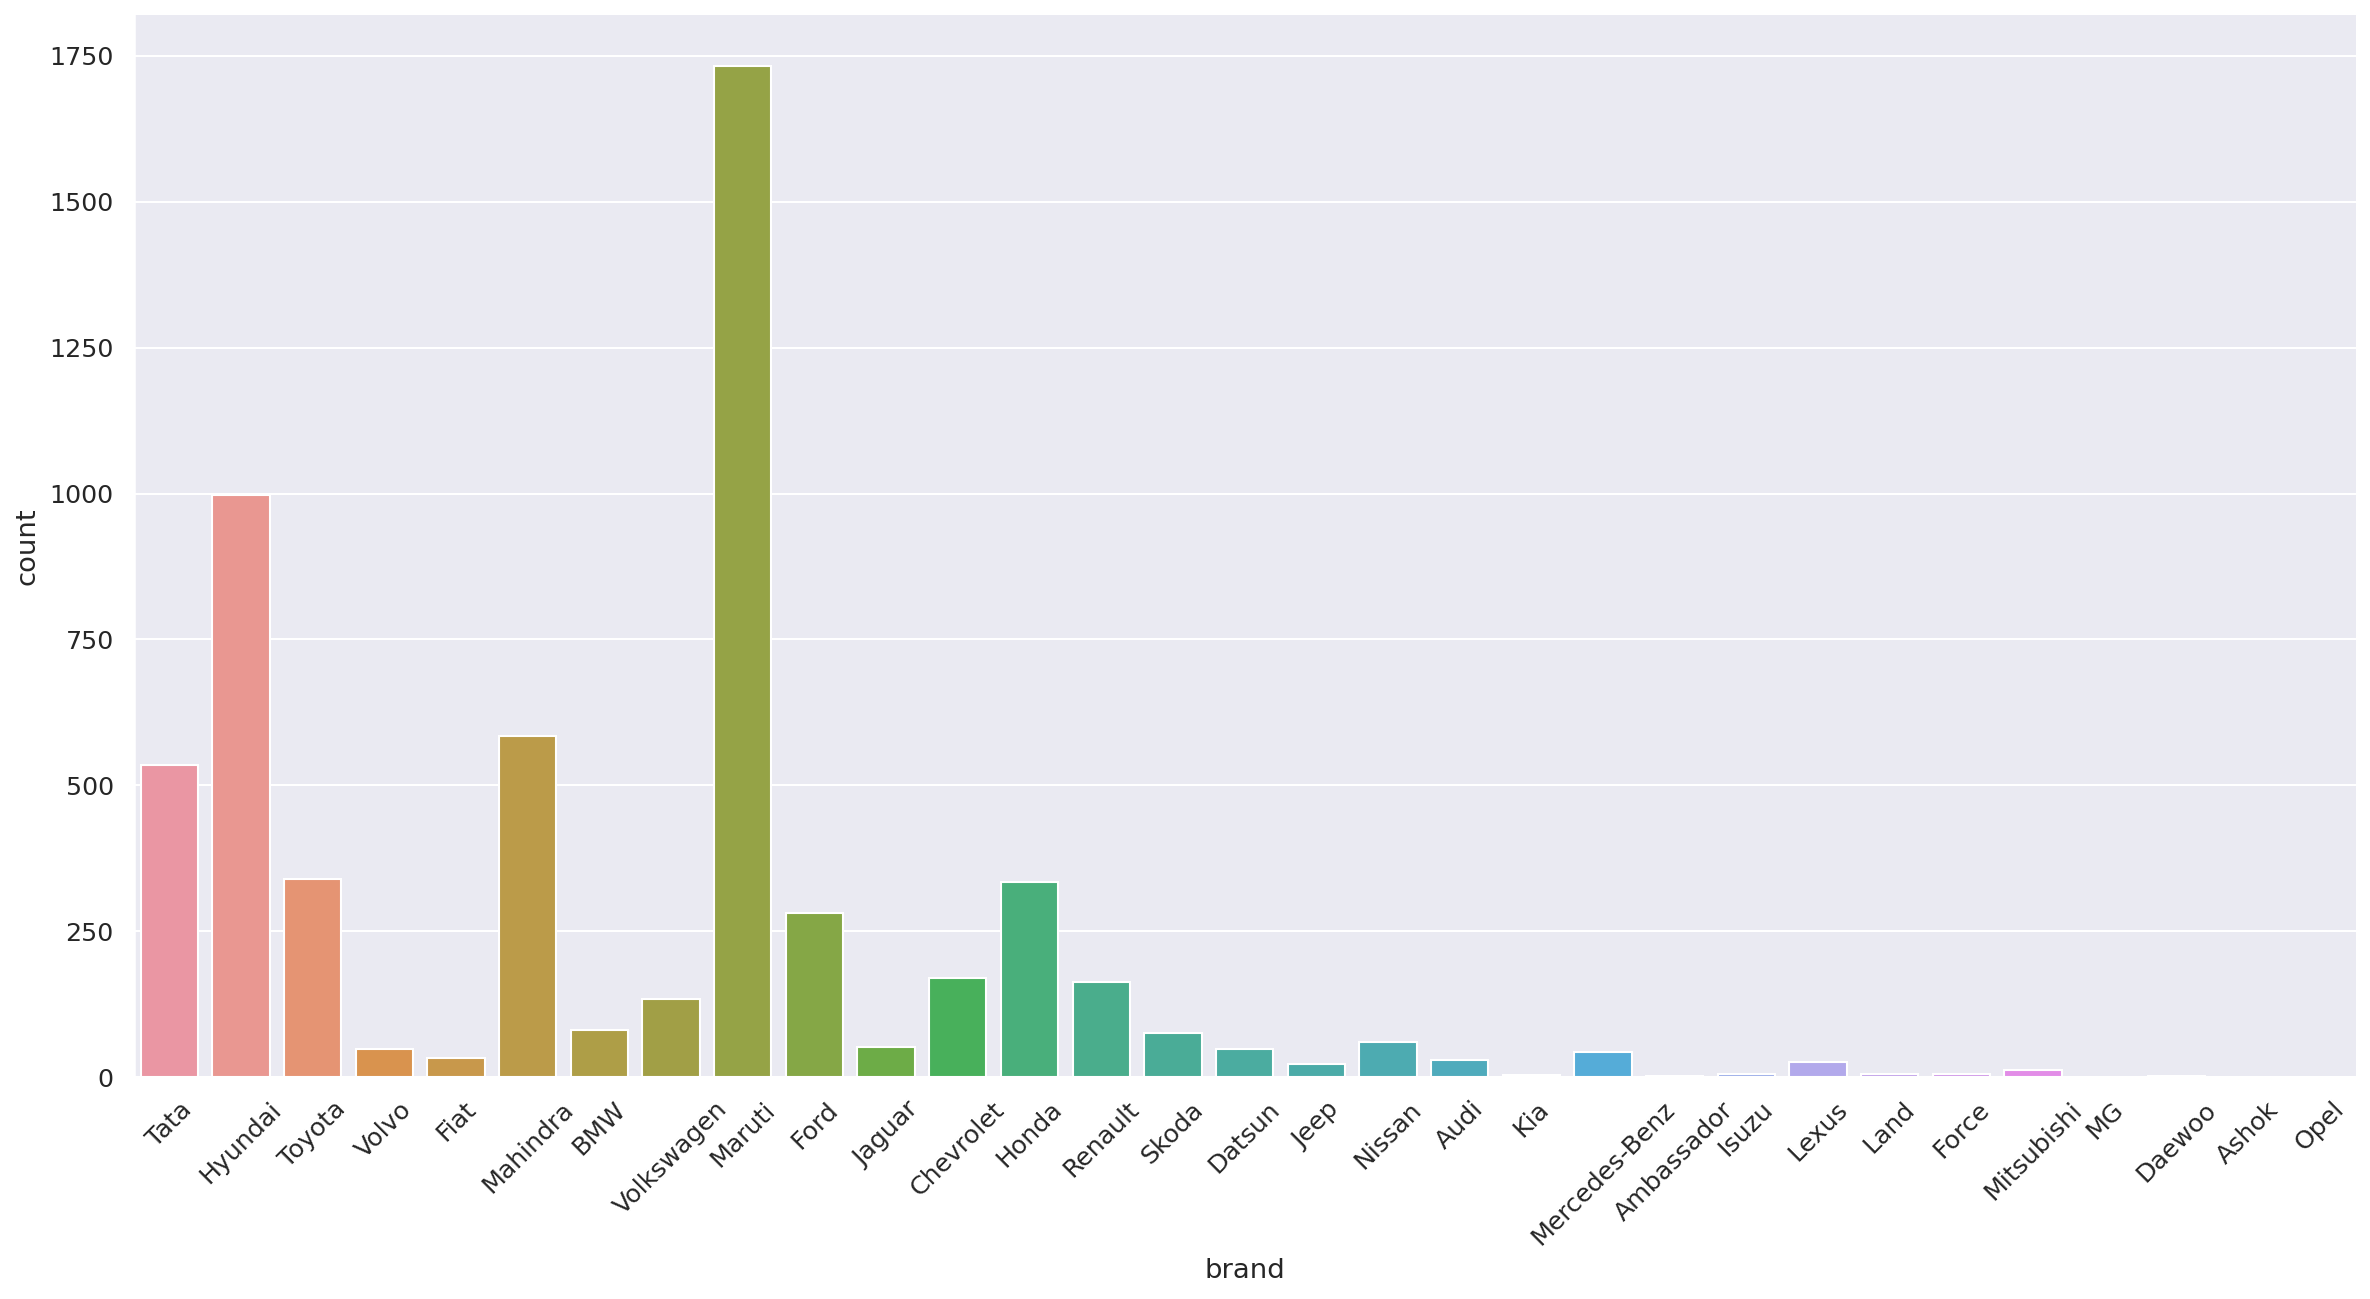

In [36]:
plt.figure(figsize=(20, 10))
sns.catplot(x='brand', kind="count", height=8, aspect=2, data=train_data);
plt.xticks(rotation=45)

# Process categorical data

## Prepare train data

In [37]:
train_data.head()

name  year  selling_price  km_driven    fuel  \
0      Tata Nexon 1.5 Revotorq XM  2018         850000       9500  Diesel   
1    Hyundai i20 Active SX Diesel  2018         750000      30000  Diesel   
2          Toyota Fortuner 4x2 AT  2015        1500000      80000  Diesel   
3       Hyundai Verna 1.6 VTVT SX  2015         795000      35000  Petrol   
4  Volvo XC40 D4 Inscription BSIV  2019        3800000      20000  Diesel   

  seller_type transmission         owner  mileage  engine  max_power  \
0  Individual       Manual   First Owner    21.50  1497.0     108.50   
1  Individual       Manual   First Owner    21.19  1396.0      88.76   
2  Individual    Automatic  Second Owner    12.55  2982.0     168.50   
3  Individual       Manual   First Owner    17.01  1591.0     121.30   
4  Individual    Automatic   First Owner    18.00  1969.0     190.00   

                   torque  seats    brand  
0     260Nm@ 1500-2750rpm      5     Tata  
1  219.66nm@ 1500-2750rpm      5  Hyundai  
2     360Nm@ 1400-3200rpm      7   Toyota  
3        154.9Nm@ 4200rpm      5  Hyundai  
4                   400Nm      5    Volvo

Till now, we have 6 categorical datas, that are:

name

fuel

seller_type

transmission

owner

torque

brand

#### Work with name

Encode name/brand with TargetEncoder

In [38]:
target_encoder = ce.TargetEncoder()

In [39]:
train_data.drop(["name"],axis=1,inplace=True)

In [40]:
train_data['brand'] = target_encoder.fit_transform(train_data['brand'], train_data['selling_price'])
train_data.head()

year  selling_price  km_driven    fuel seller_type transmission  \
0  2018         850000       9500  Diesel  Individual       Manual   
1  2018         750000      30000  Diesel  Individual       Manual   
2  2015        1500000      80000  Diesel  Individual    Automatic   
3  2015         795000      35000  Petrol  Individual       Manual   
4  2019        3800000      20000  Diesel  Individual    Automatic   

          owner  mileage  engine  max_power                  torque  seats  \
0   First Owner    21.50  1497.0     108.50     260Nm@ 1500-2750rpm      5   
1   First Owner    21.19  1396.0      88.76  219.66nm@ 1500-2750rpm      5   
2  Second Owner    12.55  2982.0     168.50     360Nm@ 1400-3200rpm      7   
3   First Owner    17.01  1591.0     121.30        154.9Nm@ 4200rpm      5   
4   First Owner    18.00  1969.0     190.00                   400Nm      5   

          brand  
0  3.734045e+05  
1  4.679383e+05  
2  1.002410e+06  
3  4.679383e+05  
4  3.079082e+06

#### Work with torque

In [41]:
train_data.torque

0          260Nm@ 1500-2750rpm
1       219.66nm@ 1500-2750rpm
2          360Nm@ 1400-3200rpm
3             154.9Nm@ 4200rpm
4                        400Nm
                 ...          
5834             90Nm@ 3500rpm
5835             77Nm@ 3500rpm
5836            114Nm@ 3500rpm
5837       180Nm@ 1440-1500rpm
5838            200Nm@ 1750rpm
Name: torque, Length: 5839, dtype: object

In [42]:
train_data

year  selling_price  km_driven    fuel seller_type transmission  \
0     2018         850000       9500  Diesel  Individual       Manual   
1     2018         750000      30000  Diesel  Individual       Manual   
2     2015        1500000      80000  Diesel  Individual    Automatic   
3     2015         795000      35000  Petrol  Individual       Manual   
4     2019        3800000      20000  Diesel  Individual    Automatic   
...    ...            ...        ...     ...         ...          ...   
5834  2010         235000      50000  Petrol  Individual       Manual   
5835  2018         390000      40000     CNG  Individual       Manual   
5836  2018         450000      75000  Petrol  Individual       Manual   
5837  2011         250000     100000  Diesel  Individual       Manual   
5838  2016         550000      35000  Diesel  Individual       Manual   

             owner  mileage  engine  max_power                  torque  seats  \
0      First Owner    21.50  1497.0     108.50     260Nm@ 1500-2750rpm      5   
1      First Owner    21.19  1396.0      88.76  219.66nm@ 1500-2750rpm      5   
2     Second Owner    12.55  2982.0     168.50     360Nm@ 1400-3200rpm      7   
3      First Owner    17.01  1591.0     121.30        154.9Nm@ 4200rpm      5   
4      First Owner    18.00  1969.0     190.00                   400Nm      5   
...            ...      ...     ...        ...                     ...    ...   
5834   First Owner    19.00   998.0      66.10           90Nm@ 3500rpm      5   
5835   First Owner    26.60   998.0      58.16           77Nm@ 3500rpm      5   
5836   First Owner    20.30  1199.0      84.00          114Nm@ 3500rpm      5   
5837  Second Owner    15.96  2523.0      63.00     180Nm@ 1440-1500rpm      9   
5838   First Owner    25.80  1498.0      98.60          200Nm@ 1750rpm      5   

             brand  
0     3.734045e+05  
1     4.679383e+05  
2     1.002410e+06  
3     4.679383e+05  
4     3.079082e+06  
...            ...  
5834  4.092420e+05  
5835  4.092420e+05  
5836  3.734045e+05  
5837  6.234718e+05  
5838  5.966706e+05  

[5839 rows x 13 columns]

In [43]:
def torque_processing(torque):
    if type(torque) == int and torque == 0:
        return 0,0 # return the value 0,0 if the torque is null, as we replace null with 0 before 
#   ------------------------------------------
    element = torque.split()
    power = []
    for e in element:
        tor = re.findall("(?:\d+(?:\.\d*)?|\.\d+)(?:[eE][+-]?\d+)?", e)
        power.append(tor)
    power = [tor for tor in power if tor]
    
    if 'kgm@' in torque:
        # 1kgm@ = 10nm
        power[0] = round(float(power[0][0]) * 10, 1)
    else:
        power[0] = round(float(power[0][0]), 1)
        
    if len(power) == 2:
        if len(power[1]) == 2:
            power[1] = round(np.mean([float(i) for i in power[1]]), 1)
        else:
            power[1] = round(float(power[1][0]), 1)
            
    if len(power) == 1:
        power.append(0)
        
    if power[1] < 1000:
        power[1] = round(power[1] * 1000, 1)
        
    return power[0], power[1]

In [44]:
train_data['torque'] = train_data['torque'].str.replace(',','.')
for i in range(train_data.shape[0]):
    torque, rpm = torque_processing(train_data['torque'].iloc[i])
    train_data.at[i, 'torque'] = torque
    train_data.at[i, 'rpm'] = rpm
    
train_data.head()                                

year  selling_price  km_driven    fuel seller_type transmission  \
0  2018         850000       9500  Diesel  Individual       Manual   
1  2018         750000      30000  Diesel  Individual       Manual   
2  2015        1500000      80000  Diesel  Individual    Automatic   
3  2015         795000      35000  Petrol  Individual       Manual   
4  2019        3800000      20000  Diesel  Individual    Automatic   

          owner  mileage  engine  max_power torque  seats         brand  \
0   First Owner    21.50  1497.0     108.50  260.0      5  3.734045e+05   
1   First Owner    21.19  1396.0      88.76  219.7      5  4.679383e+05   
2  Second Owner    12.55  2982.0     168.50  360.0      7  1.002410e+06   
3   First Owner    17.01  1591.0     121.30  154.9      5  4.679383e+05   
4   First Owner    18.00  1969.0     190.00  400.0      5  3.079082e+06   

      rpm  
0  2125.0  
1  2125.0  
2  2300.0  
3  4200.0  
4     0.0

#### Work with transmission

In [45]:
train_data['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

As we can see, there are only 2 types of transmission, so we can use One-hot encoding to encode the value

In [46]:
transmission = train_data[['transmission']]
transmission = pd.get_dummies(transmission,drop_first=True)
transmission.head()

transmission_Manual
0                    1
1                    1
2                    0
3                    1
4                    0

#### Work with owner type

In [47]:
train_data['owner'].value_counts()

First Owner             3849
Second Owner            1495
Third Owner              377
Fourth & Above Owner     113
Test Drive Car             5
Name: owner, dtype: int64

In [48]:
train_data.replace({'Test Drive Car': 0, "First Owner":1,"Second Owner":2,"Third Owner": 3,"Fourth & Above Owner": 4},inplace=True)
train_data.head()

year  selling_price  km_driven    fuel seller_type transmission  owner  \
0  2018         850000       9500  Diesel  Individual       Manual      1   
1  2018         750000      30000  Diesel  Individual       Manual      1   
2  2015        1500000      80000  Diesel  Individual    Automatic      2   
3  2015         795000      35000  Petrol  Individual       Manual      1   
4  2019        3800000      20000  Diesel  Individual    Automatic      1   

   mileage  engine  max_power  torque  seats         brand     rpm  
0    21.50  1497.0     108.50   260.0      5  3.734045e+05  2125.0  
1    21.19  1396.0      88.76   219.7      5  4.679383e+05  2125.0  
2    12.55  2982.0     168.50   360.0      7  1.002410e+06  2300.0  
3    17.01  1591.0     121.30   154.9      5  4.679383e+05  4200.0  
4    18.00  1969.0     190.00   400.0      5  3.079082e+06     0.0

#### Work with brand

In [49]:
train_data['brand'].value_counts()

4.092420e+05    1733
4.679383e+05     997
6.234718e+05     585
3.734045e+05     535
1.002410e+06     339
5.966706e+05     334
5.277829e+05     281
2.709823e+05     170
4.571768e+05     164
4.914815e+05     135
4.104512e+06      82
6.389473e+05      76
4.829500e+05      60
2.904885e+06      52
3.079082e+06      49
3.166530e+05      49
2.553295e+06      44
3.269117e+05      34
2.658800e+06      30
5.150000e+06      27
1.986565e+06      23
6.495833e+05      12
3.588524e+06       6
1.918736e+06       5
8.787833e+05       5
1.463906e+06       4
1.871165e+05       3
6.485616e+05       3
2.274268e+05       2
Name: brand, dtype: int64

Too many variation, too little data, goodbye 'brand'

In [50]:
# train_data.drop(["brand"],axis=1,inplace=True)

#### Work with seller type

In [51]:
train_data['seller_type'].value_counts()

Individual          4858
Dealer               807
Trustmark Dealer     174
Name: seller_type, dtype: int64

In [52]:
seller = train_data[['seller_type']]
seller = pd.get_dummies(seller,drop_first=True)
seller.head()

seller_type_Individual  seller_type_Trustmark Dealer
0                       1                             0
1                       1                             0
2                       1                             0
3                       1                             0
4                       1                             0

#### Work with fuel

In [53]:
fuel = train_data[['fuel']]
fuel = pd.get_dummies(fuel,drop_first=True)
fuel.head()

fuel_Diesel  fuel_LPG  fuel_Petrol
0            1         0            0
1            1         0            0
2            1         0            0
3            0         0            1
4            1         0            0

### Merging all data to final train dataset

In [54]:
final_train = pd.concat([train_data,transmission,seller, fuel],axis = 1)
final_train

year  selling_price  km_driven    fuel seller_type transmission  owner  \
0     2018         850000       9500  Diesel  Individual       Manual      1   
1     2018         750000      30000  Diesel  Individual       Manual      1   
2     2015        1500000      80000  Diesel  Individual    Automatic      2   
3     2015         795000      35000  Petrol  Individual       Manual      1   
4     2019        3800000      20000  Diesel  Individual    Automatic      1   
...    ...            ...        ...     ...         ...          ...    ...   
5834  2010         235000      50000  Petrol  Individual       Manual      1   
5835  2018         390000      40000     CNG  Individual       Manual      1   
5836  2018         450000      75000  Petrol  Individual       Manual      1   
5837  2011         250000     100000  Diesel  Individual       Manual      2   
5838  2016         550000      35000  Diesel  Individual       Manual      1   

      mileage  engine  max_power  torque  seats         brand     rpm  \
0       21.50  1497.0     108.50   260.0      5  3.734045e+05  2125.0   
1       21.19  1396.0      88.76   219.7      5  4.679383e+05  2125.0   
2       12.55  2982.0     168.50   360.0      7  1.002410e+06  2300.0   
3       17.01  1591.0     121.30   154.9      5  4.679383e+05  4200.0   
4       18.00  1969.0     190.00   400.0      5  3.079082e+06     0.0   
...       ...     ...        ...     ...    ...           ...     ...   
5834    19.00   998.0      66.10    90.0      5  4.092420e+05  3500.0   
5835    26.60   998.0      58.16    77.0      5  4.092420e+05  3500.0   
5836    20.30  1199.0      84.00   114.0      5  3.734045e+05  3500.0   
5837    15.96  2523.0      63.00   180.0      9  6.234718e+05  1470.0   
5838    25.80  1498.0      98.60   200.0      5  5.966706e+05  1750.0   

      transmission_Manual  seller_type_Individual  \
0                       1                       1   
1                       1                       1   
2                       0                       1   
3                       1                       1   
4                       0                       1   
...                   ...                     ...   
5834                    1                       1   
5835                    1                       1   
5836                    1                       1   
5837                    1                       1   
5838                    1                       1   

      seller_type_Trustmark Dealer  fuel_Diesel  fuel_LPG  fuel_Petrol  
0                                0            1         0            0  
1                                0            1         0            0  
2                                0            1         0            0  
3                                0            0         0            1  
4                                0            1         0            0  
...                            ...          ...       ...          ...  
5834                             0            0         0            1  
5835                             0            0         0            0  
5836                             0            0         0            1  
5837                             0            1         0            0  
5838                             0            1         0            0  

[5839 rows x 20 columns]

#### Remove unused column

In [55]:
final_train.drop(["fuel","seller_type","transmission"],axis=1,inplace=True)
final_train.head()

year  selling_price  km_driven  owner  mileage  engine  max_power  torque  \
0  2018         850000       9500      1    21.50  1497.0     108.50   260.0   
1  2018         750000      30000      1    21.19  1396.0      88.76   219.7   
2  2015        1500000      80000      2    12.55  2982.0     168.50   360.0   
3  2015         795000      35000      1    17.01  1591.0     121.30   154.9   
4  2019        3800000      20000      1    18.00  1969.0     190.00   400.0   

   seats         brand     rpm  transmission_Manual  seller_type_Individual  \
0      5  3.734045e+05  2125.0                    1                       1   
1      5  4.679383e+05  2125.0                    1                       1   
2      7  1.002410e+06  2300.0                    0                       1   
3      5  4.679383e+05  4200.0                    1                       1   
4      5  3.079082e+06     0.0                    0                       1   

   seller_type_Trustmark Dealer  fuel_Diesel  fuel_LPG  fuel_Petrol  
0                             0            1         0            0  
1                             0            1         0            0  
2                             0            1         0            0  
3                             0            0         0            1  
4                             0            1         0            0

In [56]:
final_train.shape

(5839, 17)

### Remove duplicates

In [57]:
final_train_data = final_train.drop_duplicates(ignore_index=True)
final_train_data

year  selling_price  km_driven  owner  mileage  engine  max_power  \
0     2018         850000       9500      1    21.50  1497.0     108.50   
1     2018         750000      30000      1    21.19  1396.0      88.76   
2     2015        1500000      80000      2    12.55  2982.0     168.50   
3     2015         795000      35000      1    17.01  1591.0     121.30   
4     2019        3800000      20000      1    18.00  1969.0     190.00   
...    ...            ...        ...    ...      ...     ...        ...   
5080  2010         235000      50000      1    19.00   998.0      66.10   
5081  2018         390000      40000      1    26.60   998.0      58.16   
5082  2018         450000      75000      1    20.30  1199.0      84.00   
5083  2011         250000     100000      2    15.96  2523.0      63.00   
5084  2016         550000      35000      1    25.80  1498.0      98.60   

      torque  seats         brand     rpm  transmission_Manual  \
0      260.0      5  3.734045e+05  2125.0                    1   
1      219.7      5  4.679383e+05  2125.0                    1   
2      360.0      7  1.002410e+06  2300.0                    0   
3      154.9      5  4.679383e+05  4200.0                    1   
4      400.0      5  3.079082e+06     0.0                    0   
...      ...    ...           ...     ...                  ...   
5080    90.0      5  4.092420e+05  3500.0                    1   
5081    77.0      5  4.092420e+05  3500.0                    1   
5082   114.0      5  3.734045e+05  3500.0                    1   
5083   180.0      9  6.234718e+05  1470.0                    1   
5084   200.0      5  5.966706e+05  1750.0                    1   

      seller_type_Individual  seller_type_Trustmark Dealer  fuel_Diesel  \
0                          1                             0            1   
1                          1                             0            1   
2                          1                             0            1   
3                          1                             0            0   
4                          1                             0            1   
...                      ...                           ...          ...   
5080                       1                             0            0   
5081                       1                             0            0   
5082                       1                             0            0   
5083                       1                             0            1   
5084                       1                             0            1   

      fuel_LPG  fuel_Petrol  
0            0            0  
1            0            0  
2            0            0  
3            0            1  
4            0            0  
...        ...          ...  
5080         0            1  
5081         0            0  
5082         0            1  
5083         0            0  
5084         0            0  

[5085 rows x 17 columns]

i see that rpm have some nan or 0 values, i will now change it to mean of the columns

In [58]:
final_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5085 entries, 0 to 5084
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          5085 non-null   int64  
 1   selling_price                 5085 non-null   int64  
 2   km_driven                     5085 non-null   int64  
 3   owner                         5085 non-null   int64  
 4   mileage                       5085 non-null   float64
 5   engine                        5085 non-null   float64
 6   max_power                     5085 non-null   float64
 7   torque                        5085 non-null   float64
 8   seats                         5085 non-null   int64  
 9   brand                         5085 non-null   float64
 10  rpm                           5085 non-null   float64
 11  transmission_Manual           5085 non-null   uint8  
 12  seller_type_Individual        5085 non-null   uint8  
 13  sel

In [59]:
final_train_data.shape

(5085, 17)

## Prepate test data

In [60]:
test_data[test_data['name'] == 'Hyundai Santro Xing XG AT eRLX Euro II']

Id                                    name  year  km_driven    fuel  \
22    23  Hyundai Santro Xing XG AT eRLX Euro II  2004      90000  Petrol   
132  133  Hyundai Santro Xing XG AT eRLX Euro II  2006     100000  Petrol   

    seller_type transmission         owner mileage engine max_power torque  \
22   Individual    Automatic  Second Owner     NaN    NaN       NaN    NaN   
132  Individual    Automatic  Second Owner     NaN    NaN       NaN    NaN   

     seats  
22     NaN  
132    NaN

In [61]:
_id = test_data.Id
test_data = test_data.iloc[:,1:]

In [62]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2128 non-null   object 
 1   year          2128 non-null   int64  
 2   km_driven     2128 non-null   int64  
 3   fuel          2128 non-null   object 
 4   seller_type   2128 non-null   object 
 5   transmission  2128 non-null   object 
 6   owner         2128 non-null   object 
 7   mileage       2066 non-null   object 
 8   engine        2066 non-null   object 
 9   max_power     2067 non-null   object 
 10  torque        2066 non-null   object 
 11  seats         2066 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 199.6+ KB


We can see that there are some null value in milage, engine, max_power, torque and seats. Lets change it to 0 for 

In [63]:
test_data = test_data.fillna(0)

In [64]:
test_data[test_data['name'] == 'Hyundai Santro Xing XG AT eRLX Euro II']

name  year  km_driven    fuel  \
22   Hyundai Santro Xing XG AT eRLX Euro II  2004      90000  Petrol   
132  Hyundai Santro Xing XG AT eRLX Euro II  2006     100000  Petrol   

    seller_type transmission         owner mileage engine max_power torque  \
22   Individual    Automatic  Second Owner       0      0         0      0   
132  Individual    Automatic  Second Owner       0      0         0      0   

     seats  
22     0.0  
132    0.0

In [65]:
for i in range(test_data.shape[0]):
    if test_data.at[i, 'mileage'] != 0:
        test_data.at[i, 'mileage'] = test_data['mileage'][i].split()[0]
    else:
        test_data.at[i, 'mileage'] = 0
        
    if test_data.at[i, 'engine'] != 0:
        test_data.at[i, 'cc'] = test_data['engine'][i].split()[0]
    else:
        test_data.at[i, 'cc'] = 0
        
    if test_data.at[i, 'max_power'] != 0:
        test_data.at[i, 'power'] = test_data['max_power'][i].split()[0]
    else:
        test_data.at[i, 'power'] = 0
print('Split Done') 


Split Done


See if data transformed correctly

In [66]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2128 non-null   object 
 1   year          2128 non-null   int64  
 2   km_driven     2128 non-null   int64  
 3   fuel          2128 non-null   object 
 4   seller_type   2128 non-null   object 
 5   transmission  2128 non-null   object 
 6   owner         2128 non-null   object 
 7   mileage       2128 non-null   object 
 8   engine        2128 non-null   object 
 9   max_power     2128 non-null   object 
 10  torque        2128 non-null   object 
 11  seats         2128 non-null   float64
 12  cc            2128 non-null   object 
 13  power         2128 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 232.9+ KB


In [67]:
test_data.dtypes

name             object
year              int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
mileage          object
engine           object
max_power        object
torque           object
seats           float64
cc               object
power            object
dtype: object

In [68]:
test_data[test_data['name'] == 'Hyundai Santro Xing XG AT eRLX Euro II']

name  year  km_driven    fuel  \
22   Hyundai Santro Xing XG AT eRLX Euro II  2004      90000  Petrol   
132  Hyundai Santro Xing XG AT eRLX Euro II  2006     100000  Petrol   

    seller_type transmission         owner mileage engine max_power torque  \
22   Individual    Automatic  Second Owner       0      0         0      0   
132  Individual    Automatic  Second Owner       0      0         0      0   

     seats cc power  
22     0.0  0     0  
132    0.0  0     0

COOL!

In [69]:
test_data['mileage'] = test_data['mileage'].astype(float)
test_data['cc'] = test_data['cc'].astype(float)
test_data['seats'] = test_data['seats'].astype(int)
test_data['power'] = test_data['power'].astype(float)
test_data

name  year  km_driven    fuel  \
0             Skoda Rapid 1.6 MPI AT Elegance  2016      11000  Petrol   
1                         Honda City i VTEC V  2017      35000  Petrol   
2           Hyundai Xcent 1.2 Kappa SX Option  2014      80000  Petrol   
3     Mahindra Scorpio 2009-2014 SLE 7S BSIII  2014     145241  Diesel   
4           Ford Ecosport 1.5 Diesel Titanium  2015      92651  Diesel   
...                                       ...   ...        ...     ...   
2123            Hyundai Grand i10 Nios Sportz  2020       2000  Petrol   
2124                   Maruti Swift Dzire VDI  2018     100000  Diesel   
2125                 Tata Indica V2 DLE BSIII  2011     172000  Diesel   
2126                Hyundai Creta 1.6 CRDi SX  2017      47000  Diesel   
2127                         Maruti Swift VXI  2012      24300  Petrol   

     seller_type transmission         owner  mileage   engine  max_power  \
0         Dealer    Automatic   First Owner    14.30  1598 CC  103.5 bhp   
1     Individual       Manual   First Owner    17.80  1497 CC  117.3 bhp   
2     Individual       Manual   First Owner    19.10  1197 CC     82 bhp   
3     Individual       Manual   First Owner    12.05  2179 CC    120 bhp   
4         Dealer       Manual   First Owner    21.70  1498 CC  98.96 bhp   
...          ...          ...           ...      ...      ...        ...   
2123      Dealer       Manual   First Owner    20.70  1197 CC  81.86 bhp   
2124  Individual       Manual  Second Owner    28.40  1248 CC  74.02 bhp   
2125  Individual       Manual  Second Owner    17.88  1396 CC   52.8 bhp   
2126  Individual       Manual  Second Owner    19.67  1582 CC  126.2 bhp   
2127      Dealer       Manual   First Owner    21.21  1197 CC  81.80 bhp   

                     torque  seats      cc   power  
0            153Nm@ 3800rpm      5  1598.0  103.50  
1            145Nm@ 4600rpm      5  1497.0  117.30  
2            114Nm@ 4000rpm      5  1197.0   82.00  
3       290Nm@ 1800-2800rpm      7  2179.0  120.00  
4       215Nm@ 1750-2500rpm      5  1498.0   98.96  
...                     ...    ...     ...     ...  
2123      113.75Nm@ 4000rpm      5  1197.0   81.86  
2124         190Nm@ 2000rpm      5  1248.0   74.02  
2125          85Nm@ 2500rpm      5  1396.0   52.80  
2126  259.9Nm@ 1900-2750rpm      5  1582.0  126.20  
2127         113Nm@ 4200rpm      5  1197.0   81.80  

[2128 rows x 14 columns]

In [70]:
test_data['torque'] = test_data['torque'].str.replace(',','.')

test_data = test_data.fillna(0)
for i in range(test_data.shape[0]):
    test_data.at[i, 'brand'] = test_data['name'][i].split()[0]
    torque, rpm = torque_processing(test_data['torque'].iloc[i])
    test_data.at[i, 'torque'] = torque
    test_data.at[i, 'rpm'] = rpm
                                 

In [71]:
test_data

name  year  km_driven    fuel  \
0             Skoda Rapid 1.6 MPI AT Elegance  2016      11000  Petrol   
1                         Honda City i VTEC V  2017      35000  Petrol   
2           Hyundai Xcent 1.2 Kappa SX Option  2014      80000  Petrol   
3     Mahindra Scorpio 2009-2014 SLE 7S BSIII  2014     145241  Diesel   
4           Ford Ecosport 1.5 Diesel Titanium  2015      92651  Diesel   
...                                       ...   ...        ...     ...   
2123            Hyundai Grand i10 Nios Sportz  2020       2000  Petrol   
2124                   Maruti Swift Dzire VDI  2018     100000  Diesel   
2125                 Tata Indica V2 DLE BSIII  2011     172000  Diesel   
2126                Hyundai Creta 1.6 CRDi SX  2017      47000  Diesel   
2127                         Maruti Swift VXI  2012      24300  Petrol   

     seller_type transmission         owner  mileage   engine  max_power  \
0         Dealer    Automatic   First Owner    14.30  1598 CC  103.5 bhp   
1     Individual       Manual   First Owner    17.80  1497 CC  117.3 bhp   
2     Individual       Manual   First Owner    19.10  1197 CC     82 bhp   
3     Individual       Manual   First Owner    12.05  2179 CC    120 bhp   
4         Dealer       Manual   First Owner    21.70  1498 CC  98.96 bhp   
...          ...          ...           ...      ...      ...        ...   
2123      Dealer       Manual   First Owner    20.70  1197 CC  81.86 bhp   
2124  Individual       Manual  Second Owner    28.40  1248 CC  74.02 bhp   
2125  Individual       Manual  Second Owner    17.88  1396 CC   52.8 bhp   
2126  Individual       Manual  Second Owner    19.67  1582 CC  126.2 bhp   
2127      Dealer       Manual   First Owner    21.21  1197 CC  81.80 bhp   

     torque  seats      cc   power     brand     rpm  
0     153.0      5  1598.0  103.50     Skoda  3800.0  
1     145.0      5  1497.0  117.30     Honda  4600.0  
2     114.0      5  1197.0   82.00   Hyundai  4000.0  
3     290.0      7  2179.0  120.00  Mahindra  2300.0  
4     215.0      5  1498.0   98.96      Ford  2125.0  
...     ...    ...     ...     ...       ...     ...  
2123  113.8      5  1197.0   81.86   Hyundai  4000.0  
2124  190.0      5  1248.0   74.02    Maruti  2000.0  
2125   85.0      5  1396.0   52.80      Tata  2500.0  
2126  259.9      5  1582.0  126.20   Hyundai  2325.0  
2127  113.0      5  1197.0   81.80    Maruti  4200.0  

[2128 rows x 16 columns]

In [72]:
test_data['brand'] = target_encoder.transform(test_data['brand'])
test_data

name  year  km_driven    fuel  \
0             Skoda Rapid 1.6 MPI AT Elegance  2016      11000  Petrol   
1                         Honda City i VTEC V  2017      35000  Petrol   
2           Hyundai Xcent 1.2 Kappa SX Option  2014      80000  Petrol   
3     Mahindra Scorpio 2009-2014 SLE 7S BSIII  2014     145241  Diesel   
4           Ford Ecosport 1.5 Diesel Titanium  2015      92651  Diesel   
...                                       ...   ...        ...     ...   
2123            Hyundai Grand i10 Nios Sportz  2020       2000  Petrol   
2124                   Maruti Swift Dzire VDI  2018     100000  Diesel   
2125                 Tata Indica V2 DLE BSIII  2011     172000  Diesel   
2126                Hyundai Creta 1.6 CRDi SX  2017      47000  Diesel   
2127                         Maruti Swift VXI  2012      24300  Petrol   

     seller_type transmission         owner  mileage   engine  max_power  \
0         Dealer    Automatic   First Owner    14.30  1598 CC  103.5 bhp   
1     Individual       Manual   First Owner    17.80  1497 CC  117.3 bhp   
2     Individual       Manual   First Owner    19.10  1197 CC     82 bhp   
3     Individual       Manual   First Owner    12.05  2179 CC    120 bhp   
4         Dealer       Manual   First Owner    21.70  1498 CC  98.96 bhp   
...          ...          ...           ...      ...      ...        ...   
2123      Dealer       Manual   First Owner    20.70  1197 CC  81.86 bhp   
2124  Individual       Manual  Second Owner    28.40  1248 CC  74.02 bhp   
2125  Individual       Manual  Second Owner    17.88  1396 CC   52.8 bhp   
2126  Individual       Manual  Second Owner    19.67  1582 CC  126.2 bhp   
2127      Dealer       Manual   First Owner    21.21  1197 CC  81.80 bhp   

     torque  seats      cc   power          brand     rpm  
0     153.0      5  1598.0  103.50  638947.328947  3800.0  
1     145.0      5  1497.0  117.30  596670.628743  4600.0  
2     114.0      5  1197.0   82.00  467938.278837  4000.0  
3     290.0      7  2179.0  120.00  623471.753846  2300.0  
4     215.0      5  1498.0   98.96  527782.879004  2125.0  
...     ...    ...     ...     ...            ...     ...  
2123  113.8      5  1197.0   81.86  467938.278837  4000.0  
2124  190.0      5  1248.0   74.02  409242.005770  2000.0  
2125   85.0      5  1396.0   52.80  373404.504673  2500.0  
2126  259.9      5  1582.0  126.20  467938.278837  2325.0  
2127  113.0      5  1197.0   81.80  409242.005770  4200.0  

[2128 rows x 16 columns]

In [73]:
test_data.replace({"Test Drive Car": 0, "First Owner":1, "Second Owner":2, "Third Owner": 3, "Fourth & Above Owner": 4},inplace=True)
test_data.head()

name  year  km_driven    fuel  \
0          Skoda Rapid 1.6 MPI AT Elegance  2016      11000  Petrol   
1                      Honda City i VTEC V  2017      35000  Petrol   
2        Hyundai Xcent 1.2 Kappa SX Option  2014      80000  Petrol   
3  Mahindra Scorpio 2009-2014 SLE 7S BSIII  2014     145241  Diesel   
4        Ford Ecosport 1.5 Diesel Titanium  2015      92651  Diesel   

  seller_type transmission  owner  mileage   engine  max_power  torque  seats  \
0      Dealer    Automatic      1    14.30  1598 CC  103.5 bhp   153.0      5   
1  Individual       Manual      1    17.80  1497 CC  117.3 bhp   145.0      5   
2  Individual       Manual      1    19.10  1197 CC     82 bhp   114.0      5   
3  Individual       Manual      1    12.05  2179 CC    120 bhp   290.0      7   
4      Dealer       Manual      1    21.70  1498 CC  98.96 bhp   215.0      5   

       cc   power          brand     rpm  
0  1598.0  103.50  638947.328947  3800.0  
1  1497.0  117.30  596670.628743  4600.0  
2  1197.0   82.00  467938.278837  4000.0  
3  2179.0  120.00  623471.753846  2300.0  
4  1498.0   98.96  527782.879004  2125.0

In [74]:
test_data.dtypes

name             object
year              int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner             int64
mileage         float64
engine           object
max_power        object
torque          float64
seats             int64
cc              float64
power           float64
brand           float64
rpm             float64
dtype: object

We dont need name, the same reason as train_data

In [75]:
test_data.head()

name  year  km_driven    fuel  \
0          Skoda Rapid 1.6 MPI AT Elegance  2016      11000  Petrol   
1                      Honda City i VTEC V  2017      35000  Petrol   
2        Hyundai Xcent 1.2 Kappa SX Option  2014      80000  Petrol   
3  Mahindra Scorpio 2009-2014 SLE 7S BSIII  2014     145241  Diesel   
4        Ford Ecosport 1.5 Diesel Titanium  2015      92651  Diesel   

  seller_type transmission  owner  mileage   engine  max_power  torque  seats  \
0      Dealer    Automatic      1    14.30  1598 CC  103.5 bhp   153.0      5   
1  Individual       Manual      1    17.80  1497 CC  117.3 bhp   145.0      5   
2  Individual       Manual      1    19.10  1197 CC     82 bhp   114.0      5   
3  Individual       Manual      1    12.05  2179 CC    120 bhp   290.0      7   
4      Dealer       Manual      1    21.70  1498 CC  98.96 bhp   215.0      5   

       cc   power          brand     rpm  
0  1598.0  103.50  638947.328947  3800.0  
1  1497.0  117.30  596670.628743  4600.0  
2  1197.0   82.00  467938.278837  4000.0  
3  2179.0  120.00  623471.753846  2300.0  
4  1498.0   98.96  527782.879004  2125.0

In [76]:
test_data.drop(["name"],axis=1,inplace=True)
test_data.drop(["engine"],axis=1,inplace=True)
test_data.drop(["max_power"],axis=1,inplace=True)

In [77]:
train_data

year  selling_price  km_driven    fuel seller_type transmission  owner  \
0     2018         850000       9500  Diesel  Individual       Manual      1   
1     2018         750000      30000  Diesel  Individual       Manual      1   
2     2015        1500000      80000  Diesel  Individual    Automatic      2   
3     2015         795000      35000  Petrol  Individual       Manual      1   
4     2019        3800000      20000  Diesel  Individual    Automatic      1   
...    ...            ...        ...     ...         ...          ...    ...   
5834  2010         235000      50000  Petrol  Individual       Manual      1   
5835  2018         390000      40000     CNG  Individual       Manual      1   
5836  2018         450000      75000  Petrol  Individual       Manual      1   
5837  2011         250000     100000  Diesel  Individual       Manual      2   
5838  2016         550000      35000  Diesel  Individual       Manual      1   

      mileage  engine  max_power  torque  seats         brand     rpm  
0       21.50  1497.0     108.50   260.0      5  3.734045e+05  2125.0  
1       21.19  1396.0      88.76   219.7      5  4.679383e+05  2125.0  
2       12.55  2982.0     168.50   360.0      7  1.002410e+06  2300.0  
3       17.01  1591.0     121.30   154.9      5  4.679383e+05  4200.0  
4       18.00  1969.0     190.00   400.0      5  3.079082e+06     0.0  
...       ...     ...        ...     ...    ...           ...     ...  
5834    19.00   998.0      66.10    90.0      5  4.092420e+05  3500.0  
5835    26.60   998.0      58.16    77.0      5  4.092420e+05  3500.0  
5836    20.30  1199.0      84.00   114.0      5  3.734045e+05  3500.0  
5837    15.96  2523.0      63.00   180.0      9  6.234718e+05  1470.0  
5838    25.80  1498.0      98.60   200.0      5  5.966706e+05  1750.0  

[5839 rows x 14 columns]

In [78]:
test_data['seller_type'].unique()

array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object)

In [79]:
Fuel_t = test_data[['fuel']]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

fuel_Diesel  fuel_LPG  fuel_Petrol
0            0         0            1
1            0         0            1
2            0         0            1
3            1         0            0
4            1         0            0

In [80]:
Transmission = test_data[['transmission']]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

transmission_Manual
0                    0
1                    1
2                    1
3                    1
4                    1

In [81]:
seller_type = test_data[['seller_type']]
seller_type = pd.get_dummies(seller_type,drop_first=True)
seller_type.head()

seller_type_Individual  seller_type_Trustmark Dealer
0                       0                             0
1                       1                             0
2                       1                             0
3                       1                             0
4                       0                             0

In [82]:
final_test= pd.concat([test_data,Transmission,seller_type, Fuel_t],axis=1)
final_test.head()

year  km_driven    fuel seller_type transmission  owner  mileage  torque  \
0  2016      11000  Petrol      Dealer    Automatic      1    14.30   153.0   
1  2017      35000  Petrol  Individual       Manual      1    17.80   145.0   
2  2014      80000  Petrol  Individual       Manual      1    19.10   114.0   
3  2014     145241  Diesel  Individual       Manual      1    12.05   290.0   
4  2015      92651  Diesel      Dealer       Manual      1    21.70   215.0   

   seats      cc   power          brand     rpm  transmission_Manual  \
0      5  1598.0  103.50  638947.328947  3800.0                    0   
1      5  1497.0  117.30  596670.628743  4600.0                    1   
2      5  1197.0   82.00  467938.278837  4000.0                    1   
3      7  2179.0  120.00  623471.753846  2300.0                    1   
4      5  1498.0   98.96  527782.879004  2125.0                    1   

   seller_type_Individual  seller_type_Trustmark Dealer  fuel_Diesel  \
0                       0                             0            0   
1                       1                             0            0   
2                       1                             0            0   
3                       1                             0            1   
4                       0                             0            1   

   fuel_LPG  fuel_Petrol  
0         0            1  
1         0            1  
2         0            1  
3         0            0  
4         0            0

In [83]:
final_test.drop(["fuel","transmission","seller_type"],axis=1,inplace=True)
final_test.head()

year  km_driven  owner  mileage  torque  seats      cc   power  \
0  2016      11000      1    14.30   153.0      5  1598.0  103.50   
1  2017      35000      1    17.80   145.0      5  1497.0  117.30   
2  2014      80000      1    19.10   114.0      5  1197.0   82.00   
3  2014     145241      1    12.05   290.0      7  2179.0  120.00   
4  2015      92651      1    21.70   215.0      5  1498.0   98.96   

           brand     rpm  transmission_Manual  seller_type_Individual  \
0  638947.328947  3800.0                    0                       0   
1  596670.628743  4600.0                    1                       1   
2  467938.278837  4000.0                    1                       1   
3  623471.753846  2300.0                    1                       1   
4  527782.879004  2125.0                    1                       0   

   seller_type_Trustmark Dealer  fuel_Diesel  fuel_LPG  fuel_Petrol  
0                             0            0         0            1  
1                             0            0         0            1  
2                             0            0         0            1  
3                             0            1         0            0  
4                             0            1         0            0

In [84]:
final_test.shape

(2128, 16)

In [85]:
final_test[final_test['rpm'] == 0]

year  km_driven  owner  mileage  torque  seats      cc  power  \
22    2004      90000      2      0.0     0.0      0     0.0    0.0   
39    2013     160254      2      0.0     0.0      0     0.0    0.0   
71    2017     165000      1      0.0     0.0      0     0.0    0.0   
121   2006     100000      2      0.0     0.0      0     0.0    0.0   
132   2006     100000      2      0.0     0.0      0     0.0    0.0   
...    ...        ...    ...      ...     ...    ...     ...    ...   
1952  2019      20000      1     18.0   400.0      5  1969.0  190.0   
1967  2006     100000      2      0.0     0.0      0     0.0    0.0   
1992  2008      90000      3      0.0     0.0      0     0.0    0.0   
2011  2006      77000      1      0.0     0.0      0     0.0    0.0   
2088  2000     250000      4      0.0     0.0      0     0.0    0.0   

             brand  rpm  transmission_Manual  seller_type_Individual  \
22    4.679383e+05  0.0                    0                       1   
39    3.269117e+05  0.0                    1                       0   
71    5.277829e+05  0.0                    1                       1   
121   4.679383e+05  0.0                    1                       1   
132   4.679383e+05  0.0                    0                       1   
...            ...  ...                  ...                     ...   
1952  3.079082e+06  0.0                    0                       1   
1967  4.092420e+05  0.0                    1                       1   
1992  4.092420e+05  0.0                    1                       1   
2011  3.734045e+05  0.0                    1                       1   
2088  1.002410e+06  0.0                    1                       1   

      seller_type_Trustmark Dealer  fuel_Diesel  fuel_LPG  fuel_Petrol  
22                               0            0         0            1  
39                               0            1         0            0  
71                               0            1         0            0  
121                              0            0         0            1  
132                              0            0         0            1  
...                            ...          ...       ...          ...  
1952                             0            1         0            0  
1967                             0            0         0            1  
1992                             0            1         0            0  
2011                             0            1         0            0  
2088                             0            1         0            0  

[72 rows x 16 columns]

In [86]:
final_test['mileage'] = final_test['mileage'].replace(0, final_test['mileage'].mean())
final_test['torque'] = final_test['torque'].replace(0, final_test['torque'].mean())
final_test['seats'] = final_test['seats'].replace(0, final_test['seats'].mode()[0]).astype(int)
final_test['cc'] = final_test['cc'].replace(0, final_test['cc'].mean())
final_test['power'] = final_test['power'].replace(0, final_test['power'].mean())
final_test['rpm'] = final_test['rpm'].replace(0, final_test['rpm'].mean())

In [87]:
final_test.dtypes

year                              int64
km_driven                         int64
owner                             int64
mileage                         float64
torque                          float64
seats                             int64
cc                              float64
power                           float64
brand                           float64
rpm                             float64
transmission_Manual               uint8
seller_type_Individual            uint8
seller_type_Trustmark Dealer      uint8
fuel_Diesel                       uint8
fuel_LPG                          uint8
fuel_Petrol                       uint8
dtype: object

In [88]:
final_test_data = final_test.rename(columns = {'cc': 'engine','power':'max_power'})
# rename a bit to match with train data
final_test_data.head()

year  km_driven  owner  mileage  torque  seats  engine  max_power  \
0  2016      11000      1    14.30   153.0      5  1598.0     103.50   
1  2017      35000      1    17.80   145.0      5  1497.0     117.30   
2  2014      80000      1    19.10   114.0      5  1197.0      82.00   
3  2014     145241      1    12.05   290.0      7  2179.0     120.00   
4  2015      92651      1    21.70   215.0      5  1498.0      98.96   

           brand     rpm  transmission_Manual  seller_type_Individual  \
0  638947.328947  3800.0                    0                       0   
1  596670.628743  4600.0                    1                       1   
2  467938.278837  4000.0                    1                       1   
3  623471.753846  2300.0                    1                       1   
4  527782.879004  2125.0                    1                       0   

   seller_type_Trustmark Dealer  fuel_Diesel  fuel_LPG  fuel_Petrol  
0                             0            0         0            1  
1                             0            0         0            1  
2                             0            0         0            1  
3                             0            1         0            0  
4                             0            1         0            0

In [89]:
seat_train = final_train_data.seats.values
torque_train = final_train_data.torque.values
rpm_train = final_train_data.rpm.values

final_train_data['Seats'] = seat_train
final_train_data['Torque'] = torque_train
final_train_data['RPM'] = rpm_train


final_train_data.drop(['seats'], axis=1, inplace=True)
final_train_data.drop(['torque'], axis=1, inplace=True)
final_train_data.drop(['rpm'], axis=1, inplace=True)

final_train_data

year  selling_price  km_driven  owner  mileage  engine  max_power  \
0     2018         850000       9500      1    21.50  1497.0     108.50   
1     2018         750000      30000      1    21.19  1396.0      88.76   
2     2015        1500000      80000      2    12.55  2982.0     168.50   
3     2015         795000      35000      1    17.01  1591.0     121.30   
4     2019        3800000      20000      1    18.00  1969.0     190.00   
...    ...            ...        ...    ...      ...     ...        ...   
5080  2010         235000      50000      1    19.00   998.0      66.10   
5081  2018         390000      40000      1    26.60   998.0      58.16   
5082  2018         450000      75000      1    20.30  1199.0      84.00   
5083  2011         250000     100000      2    15.96  2523.0      63.00   
5084  2016         550000      35000      1    25.80  1498.0      98.60   

             brand  transmission_Manual  seller_type_Individual  \
0     3.734045e+05                    1                       1   
1     4.679383e+05                    1                       1   
2     1.002410e+06                    0                       1   
3     4.679383e+05                    1                       1   
4     3.079082e+06                    0                       1   
...            ...                  ...                     ...   
5080  4.092420e+05                    1                       1   
5081  4.092420e+05                    1                       1   
5082  3.734045e+05                    1                       1   
5083  6.234718e+05                    1                       1   
5084  5.966706e+05                    1                       1   

      seller_type_Trustmark Dealer  fuel_Diesel  fuel_LPG  fuel_Petrol  Seats  \
0                                0            1         0            0      5   
1                                0            1         0            0      5   
2                                0            1         0            0      7   
3                                0            0         0            1      5   
4                                0            1         0            0      5   
...                            ...          ...       ...          ...    ...   
5080                             0            0         0            1      5   
5081                             0            0         0            0      5   
5082                             0            0         0            1      5   
5083                             0            1         0            0      9   
5084                             0            1         0            0      5   

      Torque     RPM  
0      260.0  2125.0  
1      219.7  2125.0  
2      360.0  2300.0  
3      154.9  4200.0  
4      400.0     0.0  
...      ...     ...  
5080    90.0  3500.0  
5081    77.0  3500.0  
5082   114.0  3500.0  
5083   180.0  1470.0  
5084   200.0  1750.0  

[5085 rows x 17 columns]

In [90]:
seat_test = final_test_data.seats.values
torque_test = final_test_data.torque.values
rpm_test = final_test_data.rpm.values

final_test_data['Seats'] = seat_test
final_test_data['Torque'] = torque_test
final_test_data['RPM'] = rpm_test

final_test_data.drop(['seats'], axis=1, inplace=True)
final_test_data.drop(['torque'], axis=1, inplace=True)
final_test_data.drop(['rpm'], axis=1, inplace=True)

final_test_data

year  km_driven  owner  mileage  engine  max_power          brand  \
0     2016      11000      1    14.30  1598.0     103.50  638947.328947   
1     2017      35000      1    17.80  1497.0     117.30  596670.628743   
2     2014      80000      1    19.10  1197.0      82.00  467938.278837   
3     2014     145241      1    12.05  2179.0     120.00  623471.753846   
4     2015      92651      1    21.70  1498.0      98.96  527782.879004   
...    ...        ...    ...      ...     ...        ...            ...   
2123  2020       2000      1    20.70  1197.0      81.86  467938.278837   
2124  2018     100000      2    28.40  1248.0      74.02  409242.005770   
2125  2011     172000      2    17.88  1396.0      52.80  373404.504673   
2126  2017      47000      2    19.67  1582.0     126.20  467938.278837   
2127  2012      24300      1    21.21  1197.0      81.80  409242.005770   

      transmission_Manual  seller_type_Individual  \
0                       0                       0   
1                       1                       1   
2                       1                       1   
3                       1                       1   
4                       1                       0   
...                   ...                     ...   
2123                    1                       0   
2124                    1                       1   
2125                    1                       1   
2126                    1                       1   
2127                    1                       0   

      seller_type_Trustmark Dealer  fuel_Diesel  fuel_LPG  fuel_Petrol  Seats  \
0                                0            0         0            1      5   
1                                0            0         0            1      5   
2                                0            0         0            1      5   
3                                0            1         0            0      7   
4                                0            1         0            0      5   
...                            ...          ...       ...          ...    ...   
2123                             0            0         0            1      5   
2124                             0            1         0            0      5   
2125                             0            1         0            0      5   
2126                             0            1         0            0      5   
2127                             0            0         0            1      5   

      Torque     RPM  
0      153.0  3800.0  
1      145.0  4600.0  
2      114.0  4000.0  
3      290.0  2300.0  
4      215.0  2125.0  
...      ...     ...  
2123   113.8  4000.0  
2124   190.0  2000.0  
2125    85.0  2500.0  
2126   259.9  2325.0  
2127   113.0  4200.0  

[2128 rows x 16 columns]

# Build models


## Define variable

In [91]:
RANDOM_STATE = 42
VERBOSE = 0

## Import models and other libraries

In [92]:
import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split


from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor

from sklearn.preprocessing import StandardScaler

### Show other information before train models

In [93]:
corr = final_train_data.corr()
fig = px.imshow(corr)
fig.show()

In [94]:
final_test_data.corr()

year  km_driven     owner   mileage  \
year                          1.000000  -0.364212 -0.491212  0.301925   
km_driven                    -0.364212   1.000000  0.267749 -0.115056   
owner                        -0.491212   0.267749  1.000000 -0.165107   
mileage                       0.301925  -0.115056 -0.165107  1.000000   
engine                        0.054657   0.120768  0.005621 -0.574765   
max_power                     0.241483  -0.069502 -0.109294 -0.399678   
brand                         0.182812  -0.107969 -0.103192 -0.218567   
transmission_Manual          -0.259926   0.178403  0.148214  0.191282   
seller_type_Individual       -0.246916   0.165001  0.227140  0.019043   
seller_type_Trustmark Dealer  0.094916  -0.059945 -0.072327 -0.050260   
fuel_Diesel                   0.064799   0.193977  0.020452  0.094896   
fuel_LPG                     -0.082466   0.015437 -0.001236 -0.031584   
fuel_Petrol                  -0.054871  -0.196343 -0.026660 -0.106206   
Seats                         0.035869   0.144343  0.024948 -0.417328   
Torque                        0.135247   0.025790 -0.059773 -0.262513   
RPM                          -0.010241  -0.045081  0.061780  0.014852   

                                engine  max_power     brand  \
year                          0.054657   0.241483  0.182812   
km_driven                     0.120768  -0.069502 -0.107969   
owner                         0.005621  -0.109294 -0.103192   
mileage                      -0.574765  -0.399678 -0.218567   
engine                        1.000000   0.710908  0.437920   
max_power                     0.710908   1.000000  0.688396   
brand                         0.437920   0.688396  1.000000   
transmission_Manual          -0.283711  -0.535982 -0.566059   
seller_type_Individual       -0.161053  -0.296524 -0.363189   
seller_type_Trustmark Dealer  0.061190   0.036514  0.018294   
fuel_Diesel                   0.488329   0.297251  0.177662   
fuel_LPG                     -0.058084  -0.062370 -0.024153   
fuel_Petrol                  -0.471938  -0.278997 -0.170447   
Seats                         0.595170   0.191492 -0.003436   
Torque                        0.630714   0.705390  0.477321   
RPM                          -0.098988  -0.057389 -0.028316   

                              transmission_Manual  seller_type_Individual  \
year                                    -0.259926               -0.246916   
km_driven                                0.178403                0.165001   
owner                                    0.148214                0.227140   
mileage                                  0.191282                0.019043   
engine                                  -0.283711               -0.161053   
max_power                               -0.535982               -0.296524   
brand                                   -0.566059               -0.363189   
transmission_Manual                      1.000000                0.361057   
seller_type_Individual                   0.361057                1.000000   
seller_type_Trustmark Dealer            -0.140120               -0.378846   
fuel_Diesel                              0.051818               -0.035811   
fuel_LPG                                 0.027943                0.032961   
fuel_Petrol                             -0.060692                0.025518   
Seats                                    0.083512                0.060892   
Torque                                  -0.299602               -0.172515   
RPM                                     -0.013076                0.004476   

                              seller_type_Trustmark Dealer  fuel_Diesel  \
year                                              0.094916     0.064799   
km_driven                                        -0.059945     0.193977   
owner                                            -0.072327     0.020452   
mileage                                          -0.050260     0.094896   
engine                             

In [95]:
final_train_data

year  selling_price  km_driven  owner  mileage  engine  max_power  \
0     2018         850000       9500      1    21.50  1497.0     108.50   
1     2018         750000      30000      1    21.19  1396.0      88.76   
2     2015        1500000      80000      2    12.55  2982.0     168.50   
3     2015         795000      35000      1    17.01  1591.0     121.30   
4     2019        3800000      20000      1    18.00  1969.0     190.00   
...    ...            ...        ...    ...      ...     ...        ...   
5080  2010         235000      50000      1    19.00   998.0      66.10   
5081  2018         390000      40000      1    26.60   998.0      58.16   
5082  2018         450000      75000      1    20.30  1199.0      84.00   
5083  2011         250000     100000      2    15.96  2523.0      63.00   
5084  2016         550000      35000      1    25.80  1498.0      98.60   

             brand  transmission_Manual  seller_type_Individual  \
0     3.734045e+05                    1                       1   
1     4.679383e+05                    1                       1   
2     1.002410e+06                    0                       1   
3     4.679383e+05                    1                       1   
4     3.079082e+06                    0                       1   
...            ...                  ...                     ...   
5080  4.092420e+05                    1                       1   
5081  4.092420e+05                    1                       1   
5082  3.734045e+05                    1                       1   
5083  6.234718e+05                    1                       1   
5084  5.966706e+05                    1                       1   

      seller_type_Trustmark Dealer  fuel_Diesel  fuel_LPG  fuel_Petrol  Seats  \
0                                0            1         0            0      5   
1                                0            1         0            0      5   
2                                0            1         0            0      7   
3                                0            0         0            1      5   
4                                0            1         0            0      5   
...                            ...          ...       ...          ...    ...   
5080                             0            0         0            1      5   
5081                             0            0         0            0      5   
5082                             0            0         0            1      5   
5083                             0            1         0            0      9   
5084                             0            1         0            0      5   

      Torque     RPM  
0      260.0  2125.0  
1      219.7  2125.0  
2      360.0  2300.0  
3      154.9  4200.0  
4      400.0     0.0  
...      ...     ...  
5080    90.0  3500.0  
5081    77.0  3500.0  
5082   114.0  3500.0  
5083   180.0  1470.0  
5084   200.0  1750.0  

[5085 rows x 17 columns]

In [96]:
final_test_data

year  km_driven  owner  mileage  engine  max_power          brand  \
0     2016      11000      1    14.30  1598.0     103.50  638947.328947   
1     2017      35000      1    17.80  1497.0     117.30  596670.628743   
2     2014      80000      1    19.10  1197.0      82.00  467938.278837   
3     2014     145241      1    12.05  2179.0     120.00  623471.753846   
4     2015      92651      1    21.70  1498.0      98.96  527782.879004   
...    ...        ...    ...      ...     ...        ...            ...   
2123  2020       2000      1    20.70  1197.0      81.86  467938.278837   
2124  2018     100000      2    28.40  1248.0      74.02  409242.005770   
2125  2011     172000      2    17.88  1396.0      52.80  373404.504673   
2126  2017      47000      2    19.67  1582.0     126.20  467938.278837   
2127  2012      24300      1    21.21  1197.0      81.80  409242.005770   

      transmission_Manual  seller_type_Individual  \
0                       0                       0   
1                       1                       1   
2                       1                       1   
3                       1                       1   
4                       1                       0   
...                   ...                     ...   
2123                    1                       0   
2124                    1                       1   
2125                    1                       1   
2126                    1                       1   
2127                    1                       0   

      seller_type_Trustmark Dealer  fuel_Diesel  fuel_LPG  fuel_Petrol  Seats  \
0                                0            0         0            1      5   
1                                0            0         0            1      5   
2                                0            0         0            1      5   
3                                0            1         0            0      7   
4                                0            1         0            0      5   
...                            ...          ...       ...          ...    ...   
2123                             0            0         0            1      5   
2124                             0            1         0            0      5   
2125                             0            1         0            0      5   
2126                             0            1         0            0      5   
2127                             0            0         0            1      5   

      Torque     RPM  
0      153.0  3800.0  
1      145.0  4600.0  
2      114.0  4000.0  
3      290.0  2300.0  
4      215.0  2125.0  
...      ...     ...  
2123   113.8  4000.0  
2124   190.0  2000.0  
2125    85.0  2500.0  
2126   259.9  2325.0  
2127   113.0  4200.0  

[2128 rows x 16 columns]

In [97]:
X = final_train_data.drop(['selling_price'], axis = 1) 
X

year  km_driven  owner  mileage  engine  max_power         brand  \
0     2018       9500      1    21.50  1497.0     108.50  3.734045e+05   
1     2018      30000      1    21.19  1396.0      88.76  4.679383e+05   
2     2015      80000      2    12.55  2982.0     168.50  1.002410e+06   
3     2015      35000      1    17.01  1591.0     121.30  4.679383e+05   
4     2019      20000      1    18.00  1969.0     190.00  3.079082e+06   
...    ...        ...    ...      ...     ...        ...           ...   
5080  2010      50000      1    19.00   998.0      66.10  4.092420e+05   
5081  2018      40000      1    26.60   998.0      58.16  4.092420e+05   
5082  2018      75000      1    20.30  1199.0      84.00  3.734045e+05   
5083  2011     100000      2    15.96  2523.0      63.00  6.234718e+05   
5084  2016      35000      1    25.80  1498.0      98.60  5.966706e+05   

      transmission_Manual  seller_type_Individual  \
0                       1                       1   
1                       1                       1   
2                       0                       1   
3                       1                       1   
4                       0                       1   
...                   ...                     ...   
5080                    1                       1   
5081                    1                       1   
5082                    1                       1   
5083                    1                       1   
5084                    1                       1   

      seller_type_Trustmark Dealer  fuel_Diesel  fuel_LPG  fuel_Petrol  Seats  \
0                                0            1         0            0      5   
1                                0            1         0            0      5   
2                                0            1         0            0      7   
3                                0            0         0            1      5   
4                                0            1         0            0      5   
...                            ...          ...       ...          ...    ...   
5080                             0            0         0            1      5   
5081                             0            0         0            0      5   
5082                             0            0         0            1      5   
5083                             0            1         0            0      9   
5084                             0            1         0            0      5   

      Torque     RPM  
0      260.0  2125.0  
1      219.7  2125.0  
2      360.0  2300.0  
3      154.9  4200.0  
4      400.0     0.0  
...      ...     ...  
5080    90.0  3500.0  
5081    77.0  3500.0  
5082   114.0  3500.0  
5083   180.0  1470.0  
5084   200.0  1750.0  

[5085 rows x 16 columns]

In [98]:
y = final_train_data.selling_price
y

0        850000
1        750000
2       1500000
3        795000
4       3800000
         ...   
5080     235000
5081     390000
5082     450000
5083     250000
5084     550000
Name: selling_price, Length: 5085, dtype: int64

In [99]:
X.shape

(5085, 16)

In [100]:
scoring = make_scorer(mean_squared_error,greater_is_better=False) #mse

### List models to use with GridsearchCV later

In [101]:
models = {  
             'linear_regression': LinearRegression(n_jobs = -1),
             'sgd_regression': SGDRegressor(random_state = RANDOM_STATE, warm_start = True),
             'elastic_net':ElasticNet(warm_start = True, random_state = RANDOM_STATE),
             'kernel_ridge': KernelRidge(),
             'xgb_regressor': XGBRegressor(random_state = RANDOM_STATE,  n_jobs=-1),
             'random_forest_regressor': RandomForestRegressor(random_state = RANDOM_STATE, warm_start = True, verbose = VERBOSE, n_jobs=-1),
             'SVR': SVR(cache_size = 1000, verbose = VERBOSE),
             'LGBMRegressor': LGBMRegressor(verbose = VERBOSE, random_state = RANDOM_STATE),
             'ExtraTreesRegressor' : ExtraTreesRegressor(random_state = RANDOM_STATE,warm_start = True, verbose = VERBOSE, n_jobs=-1),
             'GradientBoostingRegressor' : GradientBoostingRegressor(random_state = RANDOM_STATE, warm_start = True,  verbose = VERBOSE)
        }

### List params to use with GridsearchCV later

In [102]:
params ={
    'linear_regression':{},
    'sgd_regression':{},
    'elastic_net':{},
    'kernel_ridge':{},
    'xgb_regressor':{
        'tree_method': ['gpu_hist'],
        'predictor': ['gpu_predictor'],
        'n_estimators' : [400,500,600,700,800,900],
        'max_depth' : [5,6,7,8,9,10,15,20],
        'booster' : ['gbtree', 'dart'],
        'eta' : [0.1, 1],
        'gamma': [0.01, 0.1, 1],
        'lambda': [0.1, 1],
        'alpha': [0.1, 1]
    },
    'random_forest_regressor':{
        'n_estimators': [200,300,350,400,450,500],
        'max_depth' : [15, 25, 30],
        'max_features' : ['auto', 'sqrt', 'log2']
    },
    'SVR':{
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'C':[0.01, 0.1, 1, 2, 5]
    },
    'LGBMRegressor':{
        'n_estimators' :[700,850,1000, 1500, 1600],
        'max_depth' : [5,6,7,8,9,10,12,15],
        'num_leaves' : [25,27,29,30],
        'reg_alpha' : [0.01,0.1,1],
        'reg_lambda': [0,0.1,1]

    },
    'ExtraTreesRegressor' : {
        'n_estimators': [200,275,300,325,350,400],
        'max_depth':[5, 7, 10, 15, 20,25,30],
        'min_samples_split': [2,4,5,10],
        'min_samples_leaf': [1,2,3,5], 
        'max_features' : ['auto', 'sqrt', 'log2']
    },
    'GradientBoostingRegressor': {
        'n_estimators': [200,275,300,325,350,400, 1000, 2000],
        'learning_rate': [0.001, 0.1, 1],
         'max_depth':[5, 7, 10, 15, 20,25,30],
        'max_features' : ['sqrt', 'log2']     
    }
}

### A Class to make modeling easier

In [103]:
class EstimatorSelectionHelper:
    
    def __init__(self, models, params):
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}
    
    def fit(self, X_train, y_train, **grid_kwargs):
        for key in self.keys:
            print('Running GridSearchCV for %s.' % key)
            model = self.models[key]
            params = self.params[key]
            grid_search = GridSearchCV(model, params, **grid_kwargs)
            grid_search.fit(X_train, y_train)
            mse = grid_search.cv_results_['mean_test_score']
            grid_search.cv_results_['rmse'] = np.sqrt(-mse)
            self.grid_searches[key] = grid_search
        print('Done.')
    
    def score_summary(self, sort_by='rmse'):
        frames = []
        for name, grid_search in self.grid_searches.items():
            frame = pd.DataFrame(grid_search.cv_results_)
            frame = frame.filter(regex='^(?!.*param_).*$')
            frame['estimator'] = len(frame)*[name]
            frames.append(frame)

        df = pd.concat(frames)
        
        df = df.sort_values([sort_by], ascending=True)
        df = df.reset_index()
        
        df = df.drop(['rank_test_score', 'index', 'split0_test_score', 'split1_test_score',
                    'std_fit_time', 'std_score_time', 'std_test_score', 'mean_fit_time', 
                      'mean_score_time', 'mean_test_score'], 1)
        
        print(df.columns.tolist())
        columns = df.columns.tolist()
        columns.remove('rmse')
        columns = ['rmse']+columns
        columns.remove('estimator')
        columns = ['estimator']+columns
        df = df[columns]
        return df

## Splitting data train and validation set and train

In [104]:
X_train , X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE , test_size=0.1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
regressors = EstimatorSelectionHelper(models, params)
# regressors.fit(X_train = X_train, y_train = y_train, verbose = 3, scoring='neg_mean_squared_error', cv = 2)

### Get the summmary of models

In [105]:
# summary = regressors.score_summary()
# summary

### Export result to use later incase Kaggle session ends

In [106]:
# summary.to_csv('summary.csv', index=False)

### fit and predict data with the best model

In [107]:
regressor = LGBMRegressor(random_state = RANDOM_STATE, n_estimators = 800,
                                learning_rate = 0.15, max_depth = 8, num_leaves = 27, reg_alpha = 0.15, reg_lambda = 0.1)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(regressor.score(X_test,y_test))
print('rmse val:',np.sqrt(mean_squared_error(y_test, y_pred)))

regressor.fit(X, y)
pred = regressor.predict(scaler.transform(final_test_data))

print('score on all train:', regressor.score(X,y))

pred = regressor.predict(final_test_data.values)
pred

0.9575282614261028
rmse val: 106487.43088052624
score on all train: 0.9908186685942516


array([ 666058.62411564,  846474.12163822,  407408.12973783, ...,
        113839.20638609, 1011032.34994054,  370268.49287771])

### Export result

In [108]:
submit = sample_data
submit.Predicted = pred
submit.to_csv('LGBMRegressor.csv', index=False)